## Overview

Perform some analysis of IBD, specifically:

- Plot summaries of IBD data (total IBD, no. tracts), comparing within and between sampling sites.

- Perhaps a network?

In [1]:
%run setup.ipynb

In [2]:
# plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
plt.rcParams['figure.dpi'] = 120
%config InlineBackend.figure_formats = {'retina', 'png'}

In [3]:
regions = {
    "3R": (1000000, 37000000),
    "3L": (15000000, 41000000)}

In [4]:
from pathlib import Path

In [5]:
ibd_data = Path("/kwiat/vector/ag1000g/analysis/20180625-IBD-phase2", "output")

In [6]:
colnames = ("sample1", "id1", "sample2", "id2", 
            "chrom", "start", "stop", "LOD")

In [7]:
def get_ibd_calls(pop, min_len=10000):

    q = {}
    for chrom, reg in regions.items():
        
        fstem = ibd_data / chrom / (pop + ".ibd")
        
#         fstem = ibd_data / 'ag1000g_region_{pop}S_{c}_free.ibd'.format(
#             pop=pop, c=chrom)
        
        start, end = reg
        q[chrom] = pd.read_csv(
            fstem, header=None, names=colnames, sep="\t").query(
            "start >= @start").query(
            "stop < @end")

    ibd_tab = pd.concat(q).reset_index(drop=True)
    ibd_tab["ibd_chunk_size"] = ibd_tab.stop - ibd_tab.start
    ibd_tab = ibd_tab.query("ibd_chunk_size >= @min_len")
    return ibd_tab

## Distribution of IBD chunk sizes

Consider applying minimum? Drop below 10k? 

In [8]:
from itertools import combinations
from scipy.stats import mannwhitneyu

In [9]:
from ag1k import phase1_ar3

In [10]:
phase1_ar3.init("../phase1.AR3")

In [11]:
phase1_ar3.df_samples

ox_code src_code sra_sample_accession population       country  \
index                                                                    
0      AB0085-C    BF2-4            ERS223996        BFS  Burkina Faso   
1      AB0087-C    BF3-3            ERS224013        BFM  Burkina Faso   
2      AB0088-C    BF3-5            ERS223991        BFM  Burkina Faso   
3      AB0089-C    BF3-8            ERS224031        BFM  Burkina Faso   
4      AB0090-C   BF3-10            ERS223936        BFM  Burkina Faso   
5      AB0091-C   BF3-12            ERS224065        BFM  Burkina Faso   
6      AB0092-C   BF3-13            ERS224043        BFM  Burkina Faso   
7      AB0094-C   BF3-17            ERS224057        BFM  Burkina Faso   
8      AB0095-C    BF4-1            ERS224021        BFM  Burkina Faso   
9      AB0097-C    BF4-5            ERS224030        BFM  Burkina Faso   
10     AB0098-C    BF4-6            ERS223999        BFM  Burkina Faso   
11     AB0099-C    BF6-1            ERS223941        BFM  Burkina Faso   
12     AB0100-C    BF6-2            ERS224020        BFM  Burkina Faso   
13     AB0101-C    BF6-3            ERS223977        BFM  Burkina Faso   
14     AB0103-C    BF6-7            ERS223970        BFS  Burkina Faso   
15     AB0104-C    BF6-8            ERS223976        BFS  Burkina Faso   
16     AB0109-C    BF9-1            ERS223925        BFM  Burkina Faso   
17     AB0110-C    BF9-2            ERS224009        BFM  Burkina Faso   
18     AB0111-C    BF9-3            ERS224056        BFM  Burkina Faso   
19     AB0112-C   BF3-18            ERS224015        BFM  Burkina Faso   
20     AB0113-C   BF3-19            ERS223984        BFM  Burkina Faso   
21     AB0114-C    BF4-7            ERS224023        BFM  Burkina Faso   
22     AB0117-C   BF3-21            ERS224010        BFS  Burkina Faso   
23     AB0119-C   BF3-23            ERS224017        BFS  Burkina Faso   
24     AB0122-C   BF3-26            ERS224064        BFM  Burkina Faso   
25     AB0123-C   BF3-27            ERS224045        BFM  Burkina Faso   
26     AB0124-C   BF3-28            ERS224044        BFM  Burkina Faso   
27     AB0126-C   BF3-30            ERS224079        BFS  Burkina Faso   
28     AB0127-C   BF3-31            ERS224775        BFS  Burkina Faso   
29     AB0128-C   BF3-32            ERS224011        BFS  Burkina Faso   
...         ...      ...                  ...        ...           ...   
735    AV0002-C    KB002            ERS224584        GNS        Guinea   
736    AV0003-C    KB003            ERS224640        GNS        Guinea   
737    AV0004-C    KB008            ERS224852        GNS        Guinea   
738    AV0005-C    KB010            ERS224617        GNS        Guinea   
739    AV0007-C    KB041            ERS224551        GNS        Guinea   
740    AV0008-C    KB051            ERS224513        GNS        Guinea   
741    AV0009-C    KB054            ERS224858        GNS        Guinea   
742    AV0010-C    KB057            ERS224532        GNS        Guinea   
743    AV0011-C    KB058            ERS224630        GNS        Guinea   
744    AV0012-C    KB066            ERS224567        GNS        Guinea   
745    AV0013-C    KB081            ERS224614        GNS        Guinea   
746    AV0014-C    KB088            ERS224604        GNS        Guinea   
747    AV0015-C    KB089            ERS224530        GNS        Guinea   
748    AV0018-C    KB111            ERS224648        GNS        Guinea   
749    AV0024-C    KB162            ERS224575        GNS        Guinea   
750    AV0026-C    KD005            ERS224500        GNS        Guinea   
751    AV0027-C    KD029            ERS224636        GNS        Guinea   
752    AV0029-C    KD044            ERS224606        GNS        Guinea   
753    AV0030-C    KD104            ERS224856        GNS        Guinea   
754    AV0031-C    KD105            ERS224583        GNS        Guinea   
755    AV0032-C    KD130            ERS224543        GNS        Guinea   
756    AV003

In [12]:
def within_between(pair, df, loc='region'):    
    return "-".join(sorted(df.loc[list(pair)][loc].unique()))

In [13]:
def stat_tests(all_ibd):
        
    rholder = []
    result = r"{a} vs {b}. U={stat}. P-value={pv:.2e}"

    for (a, b) in combinations(all_ibd.site.unique(), 2):

        xval = all_ibd.query("site == @a").IBDsum
        yval = all_ibd.query("site == @b").IBDsum

        x = mannwhitneyu(x=xval, y=yval)

        if x.pvalue < 0.001:
            q = "$^{**}$"
        elif x.pvalue < 0.01:
            q = "$^{*}$"
        else:
            q = ""

        rholder.append(
            result.format(a=a, b=b, stat=x.statistic, pv=x.pvalue)+q)
        
    return rholder

In [14]:
6 % 2

0

In [19]:
def ibd_plots(all_ibd, statres, max_chunk):

    _ = sns.lmplot(
        x="IBDsum", y="IBDcount",
        data=all_ibd, 
        hue="site", 
        fit_reg=False)

    fig, ax = plt.subplots()
    ax = sns.violinplot(
        x="site", y="IBDsum", data=all_ibd)
    ax.set_ylim(bottom=0.0)

    fig, ax = plt.subplots()
    ax = sns.boxplot(x="site", y="IBDcount", 
                     data=all_ibd)
    ax.set_ylim(bottom=0.0)

    ## Alternate data presentation
    fig, ax = plt.subplots()
    ax = sns.stripplot(x="site", y="IBDsum", 
                       data=all_ibd, jitter=True,
                       alpha=0.5)

    ax.set_ylim(bottom=-1)
    ax.text(0.9, ax.get_ylim()[1]*1.1, "\n".join(statres), fontsize=6)

    # This is the distribution plots of each combination
    n_comparisons = len(all_ibd.site.unique())
    bins = np.linspace(0, max_chunk, 50)
    
    if n_comparisons == 3:
        subp = 1, 3
        fig, axes = plt.subplots(
            1, 3,
            sharex=True, 
            sharey=True,
            figsize=(10, 4))
        
        for i, v in enumerate(all_ibd.site.unique()):
            ax = axes[i]

            a = all_ibd.query("site == @v").IBDsum
            sns.distplot(a, ax=ax, 
                         kde=False, 
                         norm_hist=True,
                         bins=bins)
            ax.set_title(v)

    elif n_comparisons == 6:

        fig, axes = plt.subplots(
            2, 3,
            sharex=True, 
            sharey=True,
            figsize=(10, 4))
        
        for ix, v in enumerate(all_ibd.site.unique()):
            
            i = ix // 3
            j = ix % 3
            
            ax = axes[i, j]

            a = all_ibd.query("site == @v").IBDsum
            sns.distplot(a, ax=ax, 
                         kde=False, 
                         norm_hist=True,
                         bins=bins)
            ax.set_title(v)
        
    else:
        print(n_comparisons, "is not as expected")
        return None
    
    

In [20]:
def analysis_wrapper(pop, samples_frame, loc='region'):
    
    ibd_tab = get_ibd_calls(pop)
    
    sns.distplot(ibd_tab.ibd_chunk_size)

    samples = samples_frame.query("population == @pop").copy()   
    
    all_samples = samples.index.tolist()
    
    t = tuple(combinations(all_samples, 2))
    assert len(t) > 1
    
#     all_pairs_ibd = pd.DataFrame(
#         index=pd.MultiIndex.from_tuples(t),
#         columns=["IBDsum", "IBDcount", "site"], dtype=None)
        
    # group the original data to look up by pair.
    # We know that order ensures (A, B), never (B, A)
    all_pairs_ibd = ibd_tab.groupby(
        ["sample1", "sample2"]).ibd_chunk_size.agg([np.sum, len])
    
    all_pairs_ibd.columns = "IBDsum", "IBDcount"
    #print(all_pairs_ibd.head())
    
    all_pairs_ibd = all_pairs_ibd.reindex(index=t, fill_value=0)
    all_pairs_ibd["site"] = all_pairs_ibd.index.map(
        lambda y: within_between(y, samples, loc=loc))
    
    for f in "IBDsum", "IBDcount":
        all_pairs_ibd[f] = all_pairs_ibd[f].astype("int")
    
    rholder = stat_tests(all_pairs_ibd)
    

    
    ibd_plots(all_pairs_ibd, rholder, ibd_tab.ibd_chunk_size.max())
    
    return ibd_tab, all_pairs_ibd

In [21]:
p2 = phase2_ar1.df_samples
p1 = p2.loc[phase1_ar3.df_samples.ox_code]

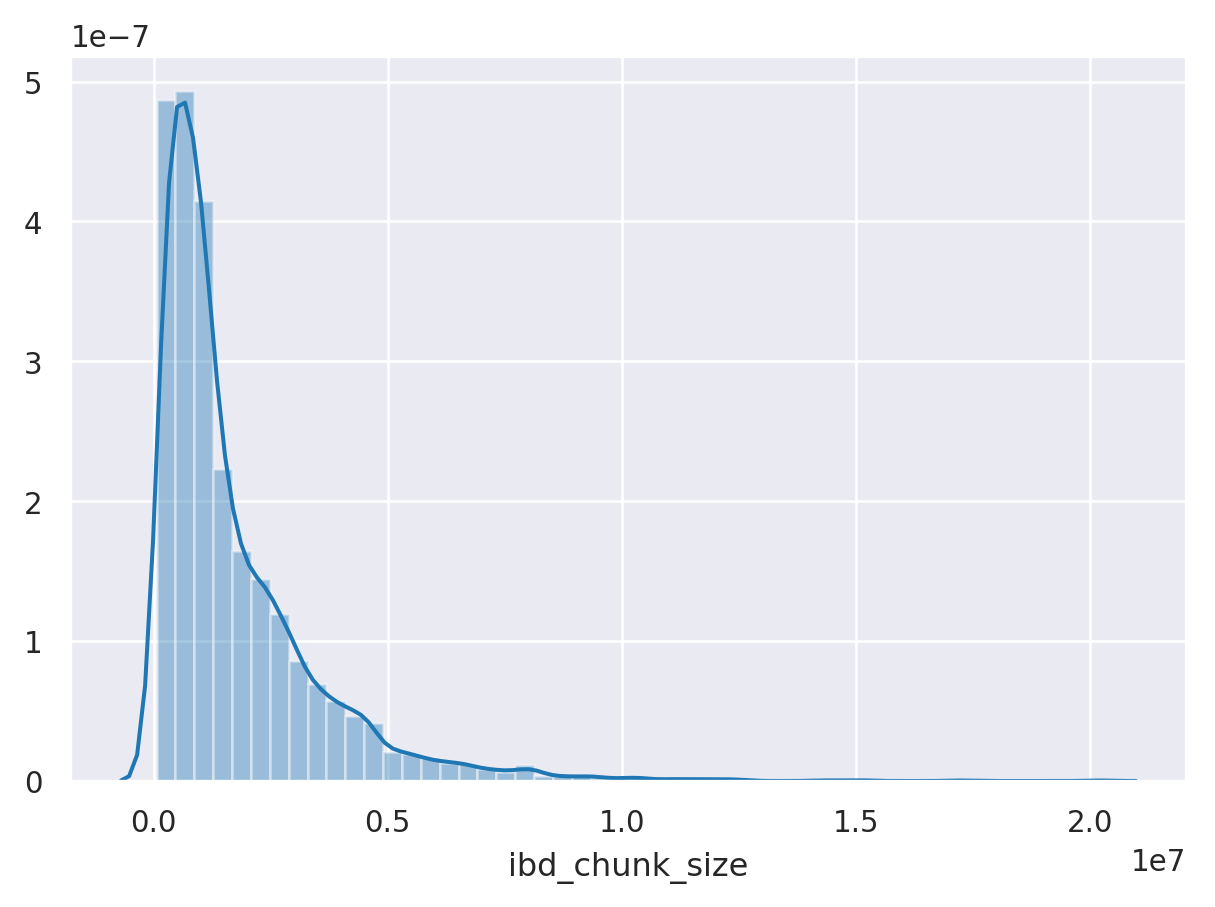

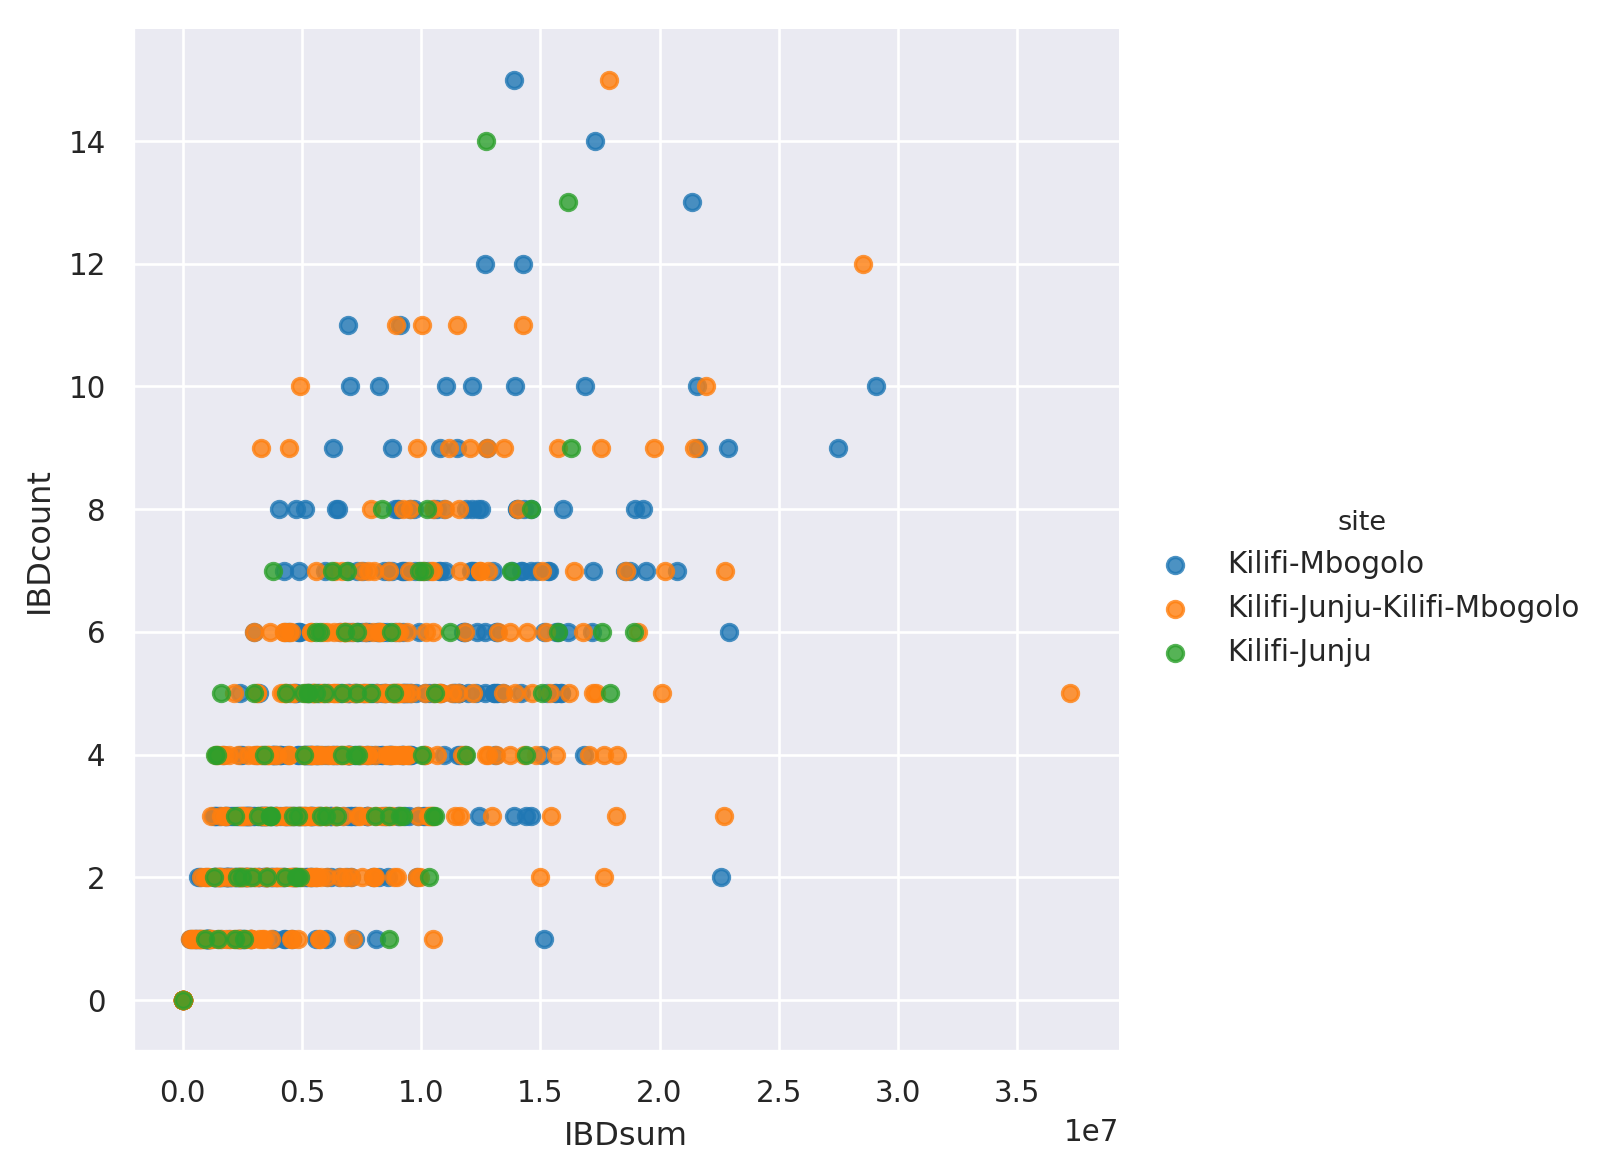

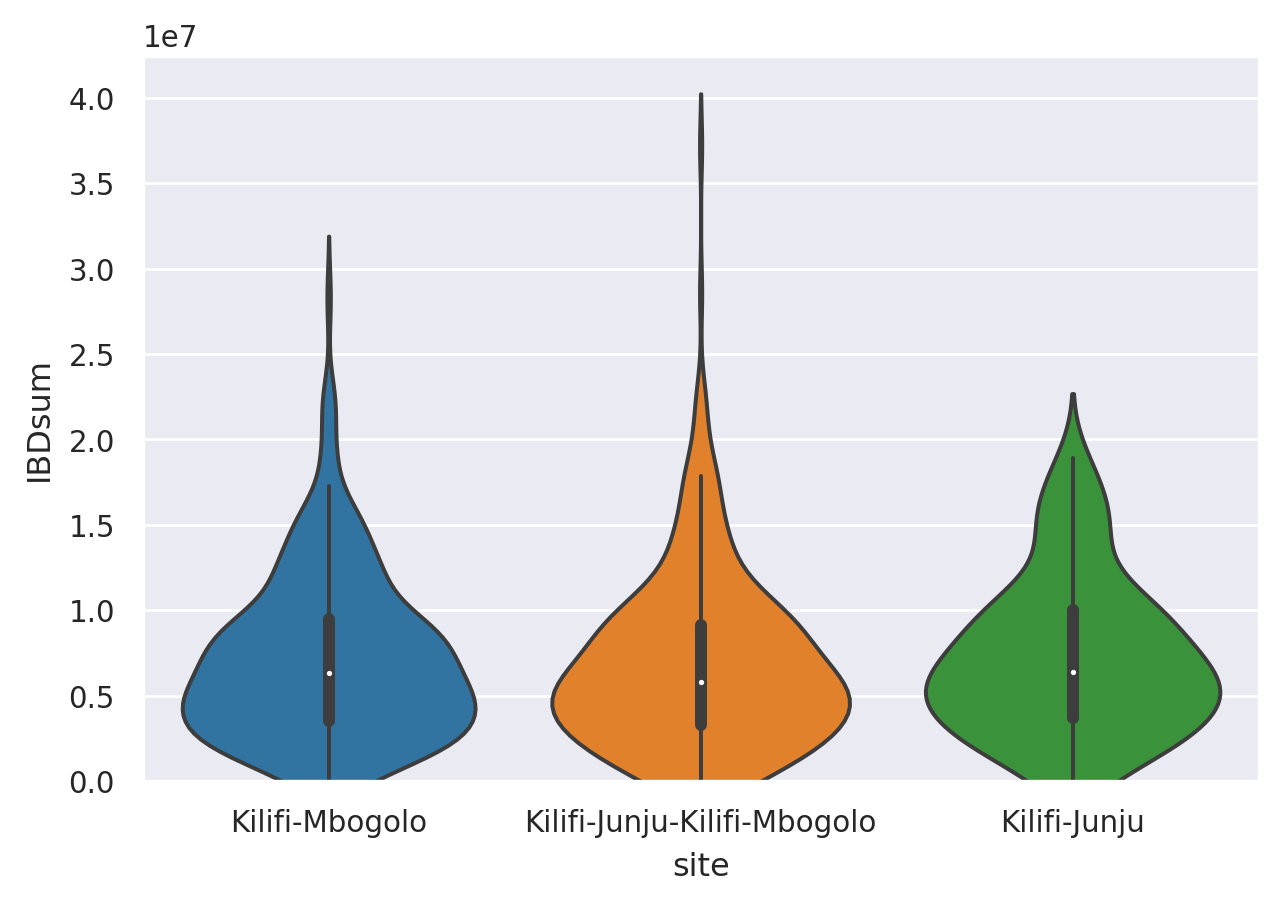

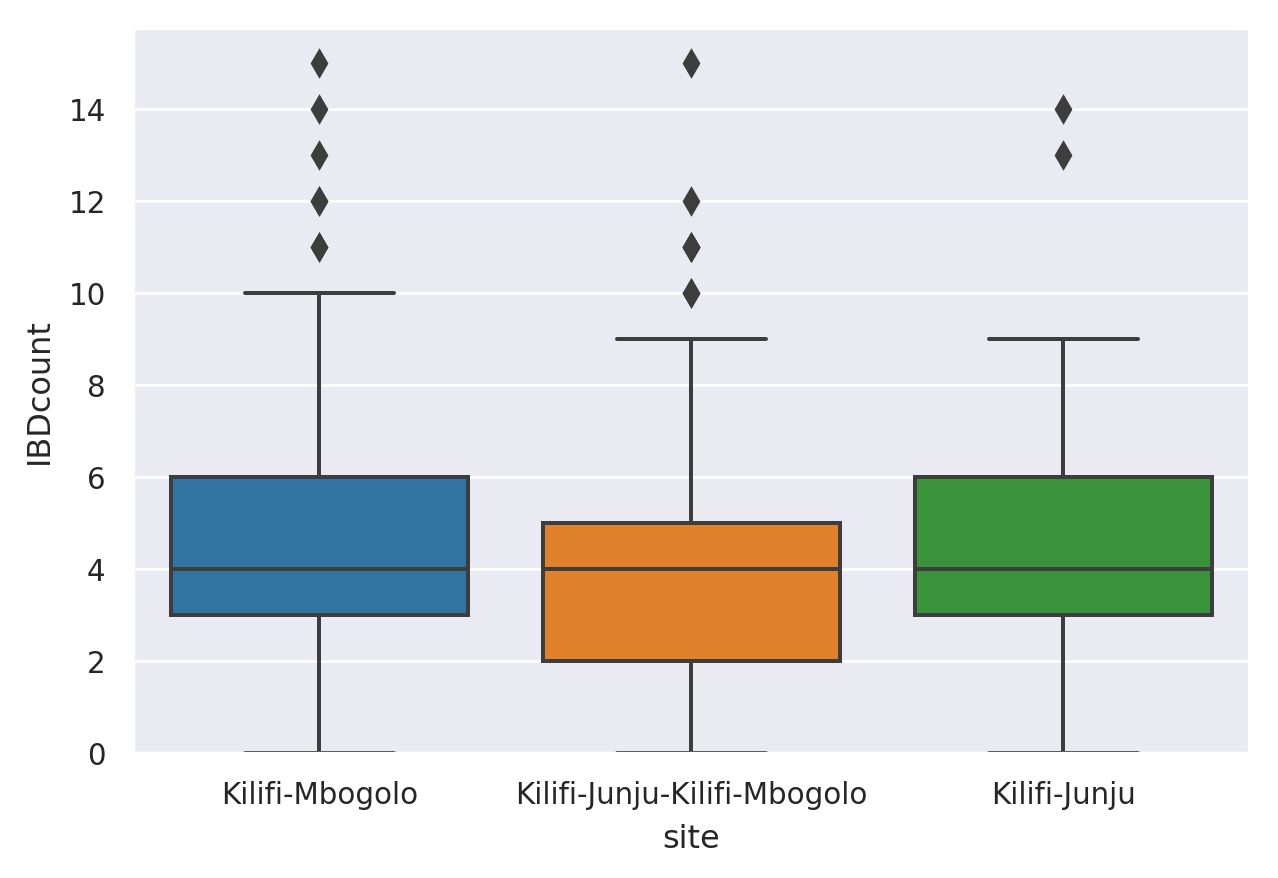

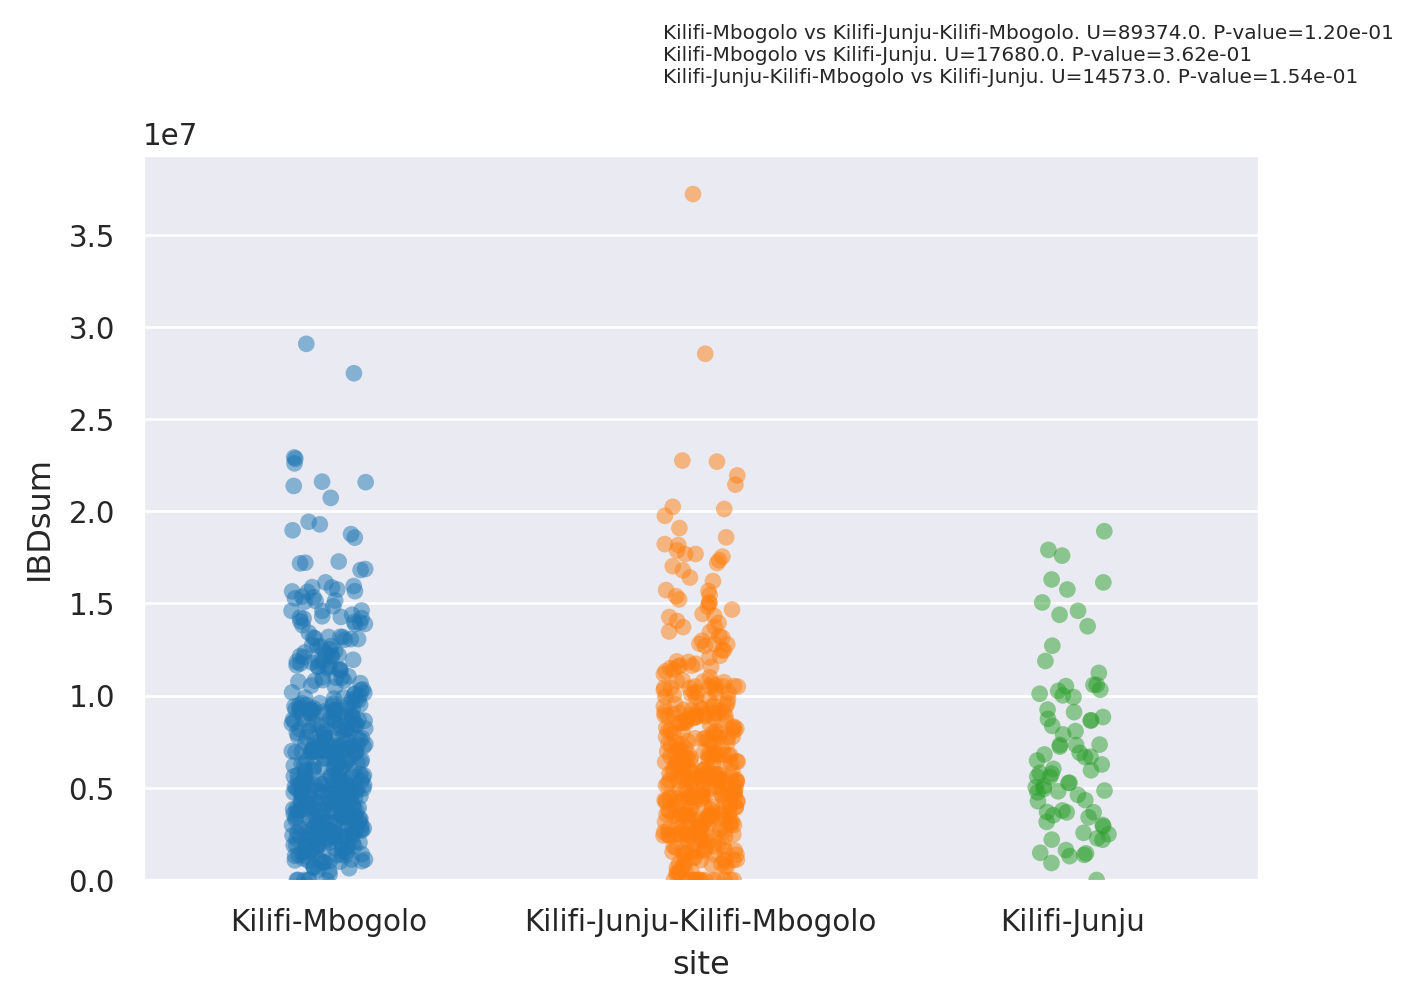

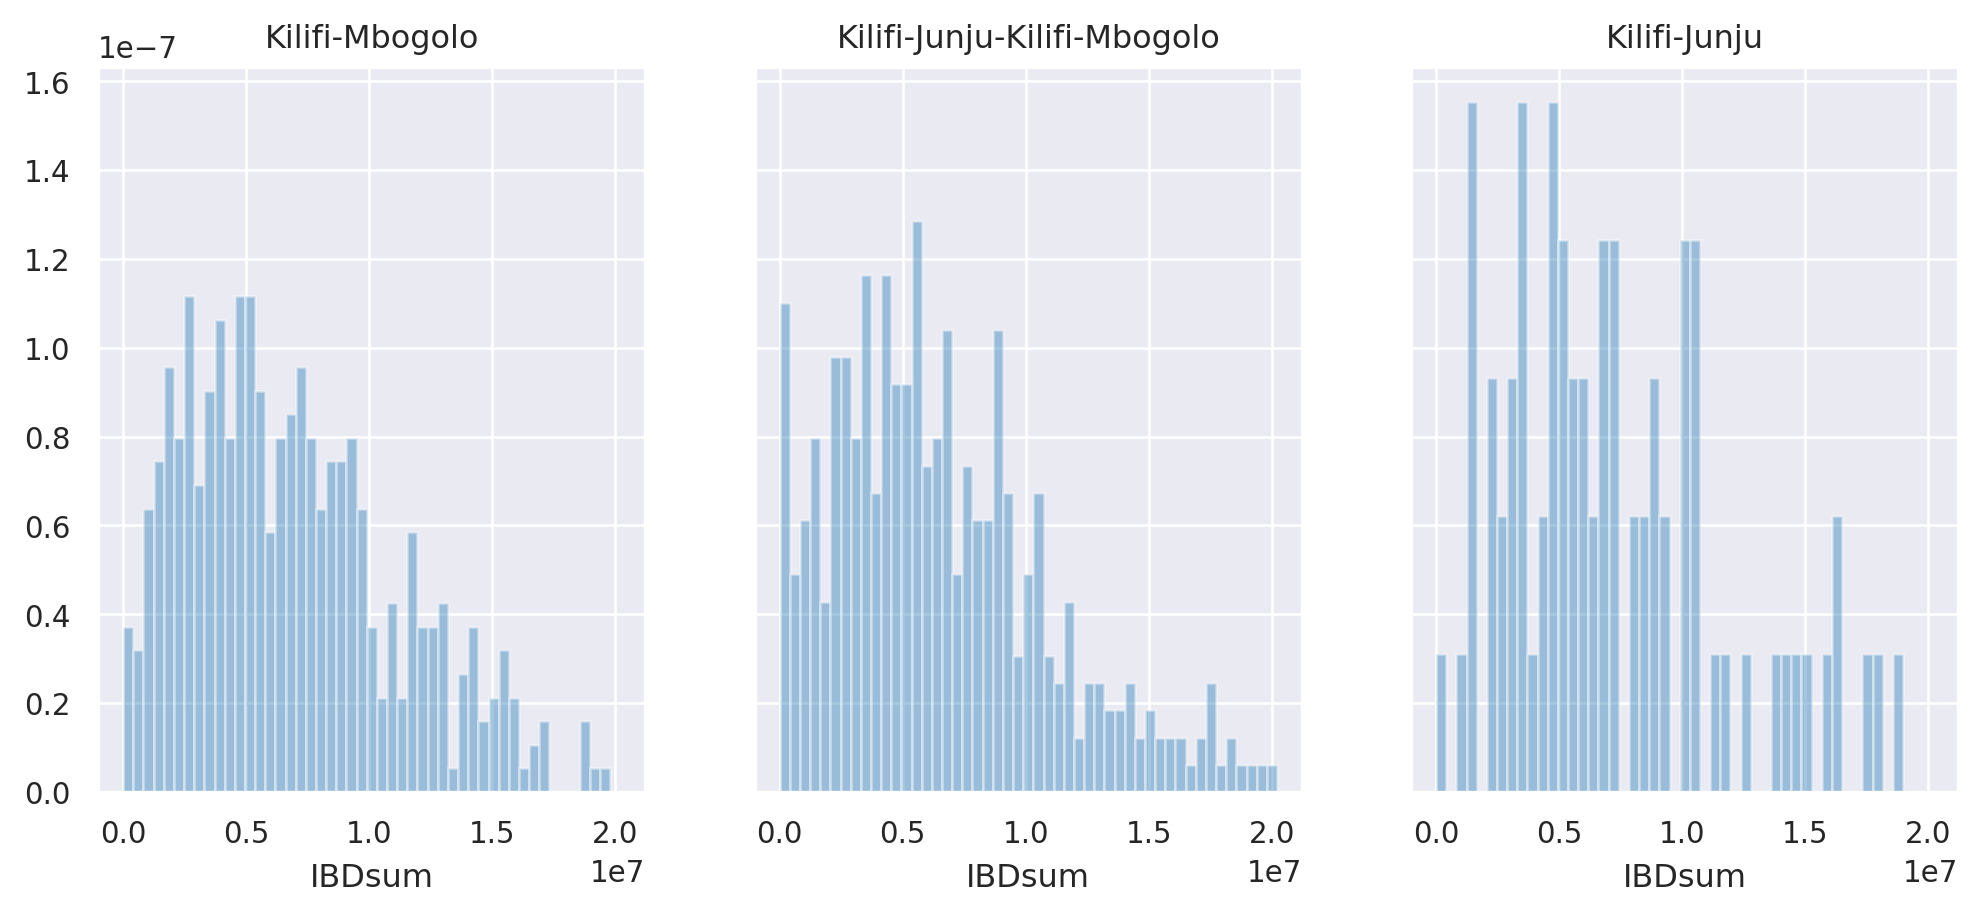

In [22]:
_ = analysis_wrapper("KE", p1)

In [23]:
df_samples = phase2_ar1.df_samples

# minor edits to regions... 
# group all Bana, remove region that only has one sample
df_samples['greater_region'] = df_samples.region.str.replace("Bana .+", "Bana")    
df_samples = df_samples.query("region != 'Koforidua'")

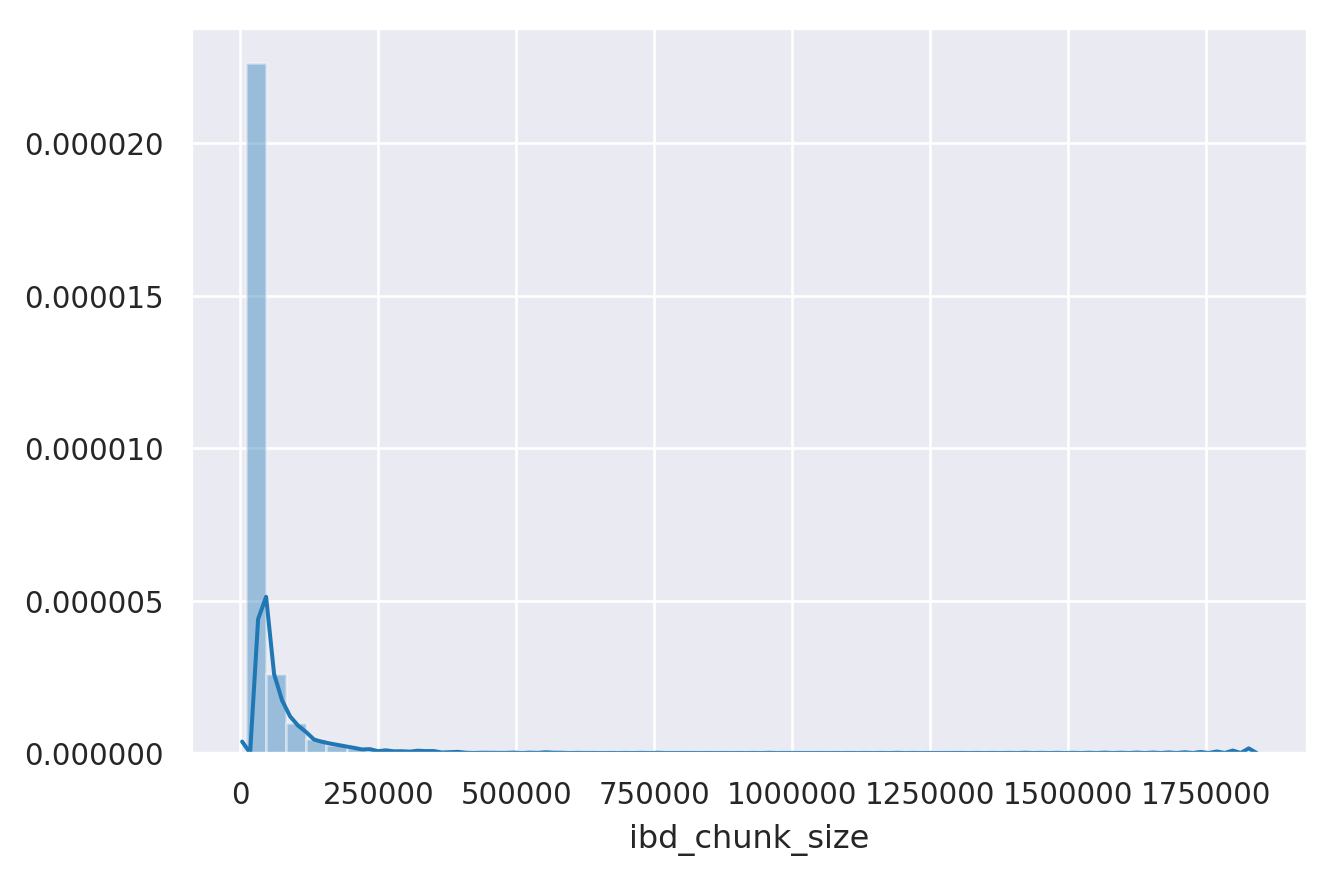

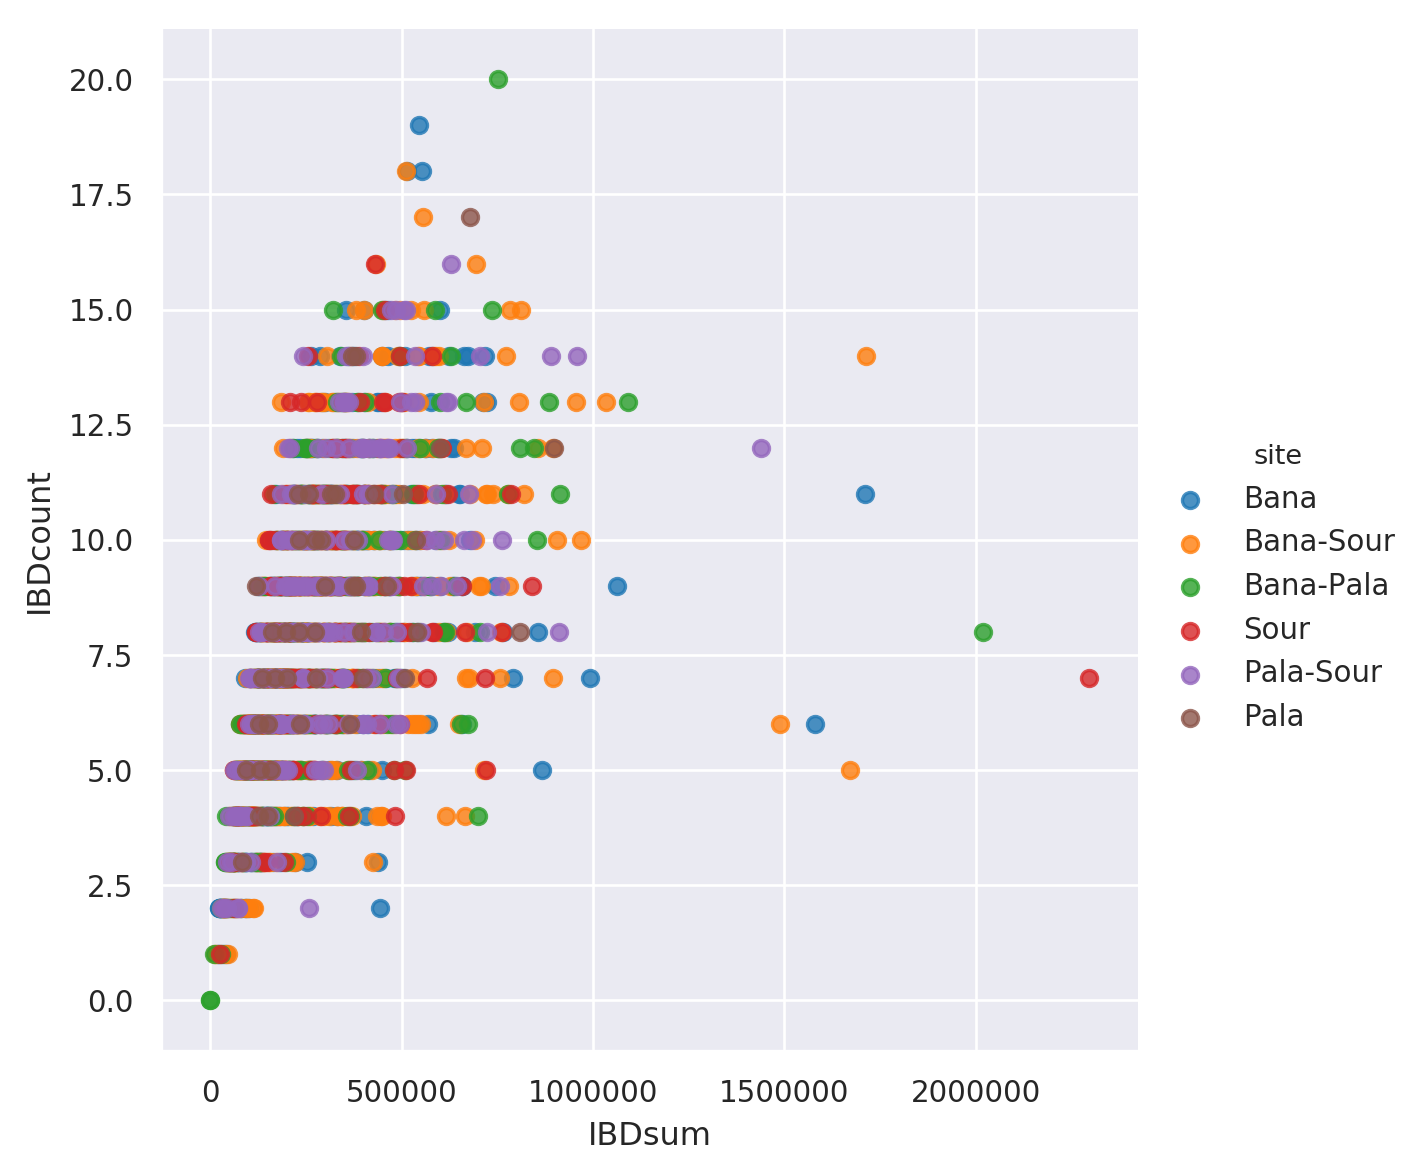

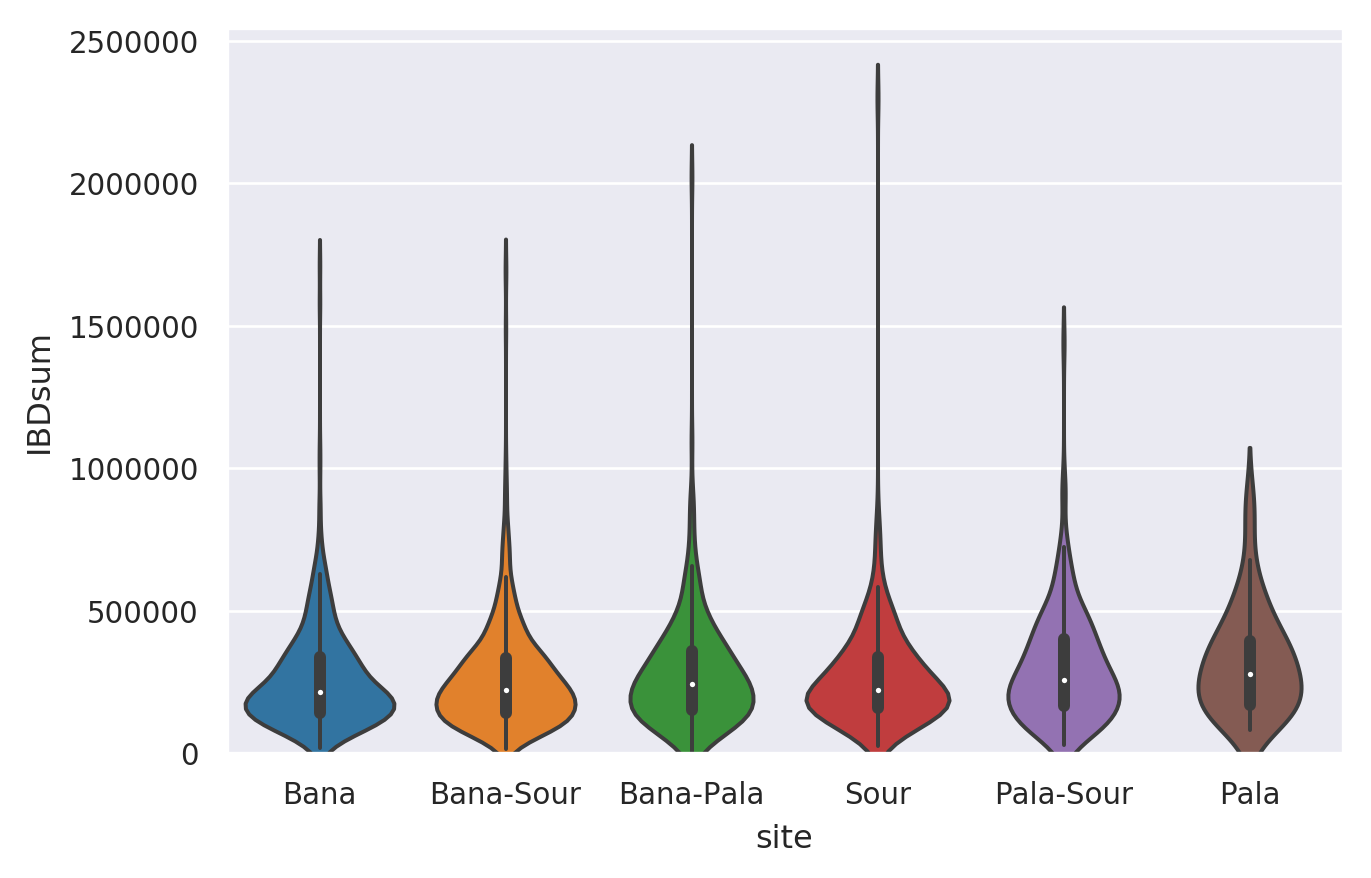

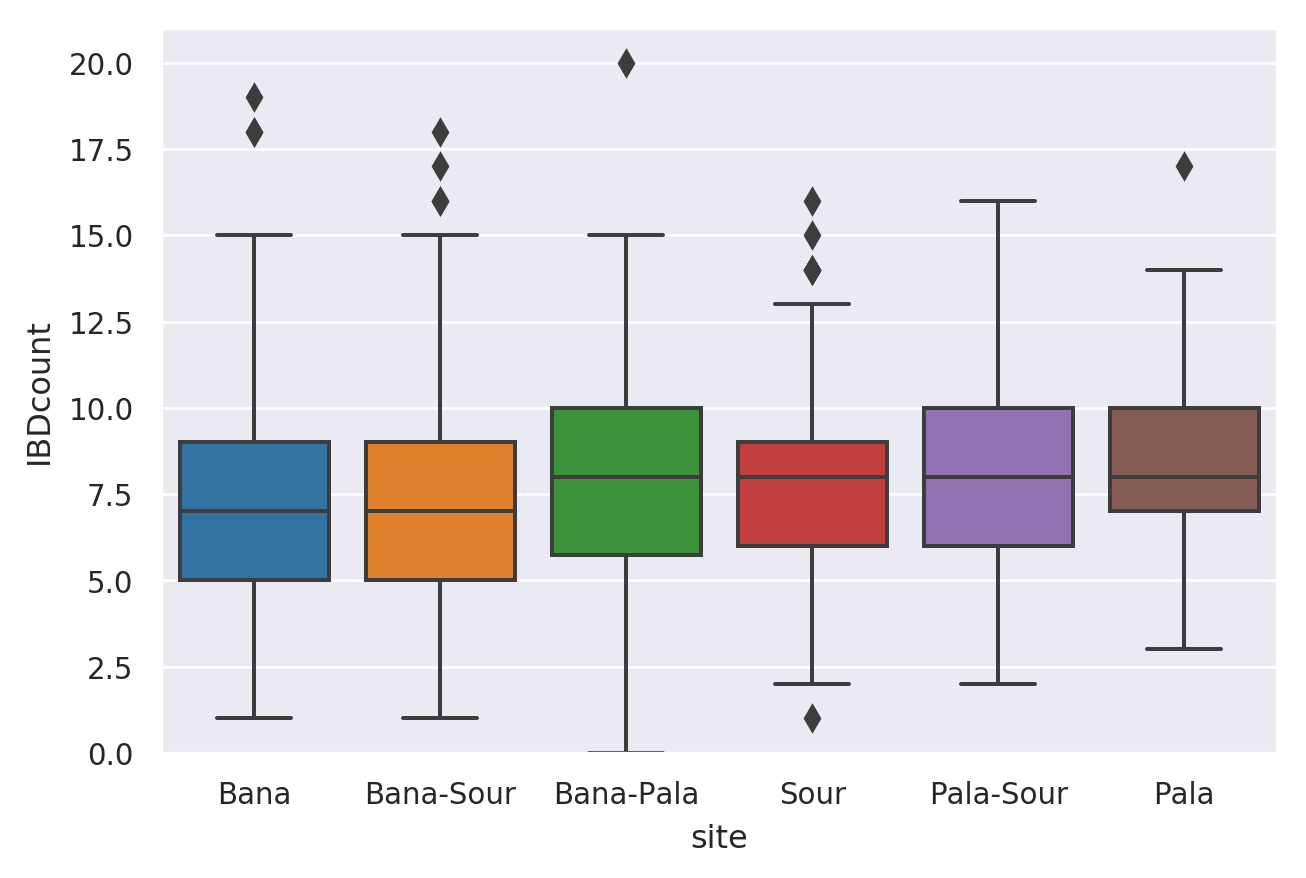

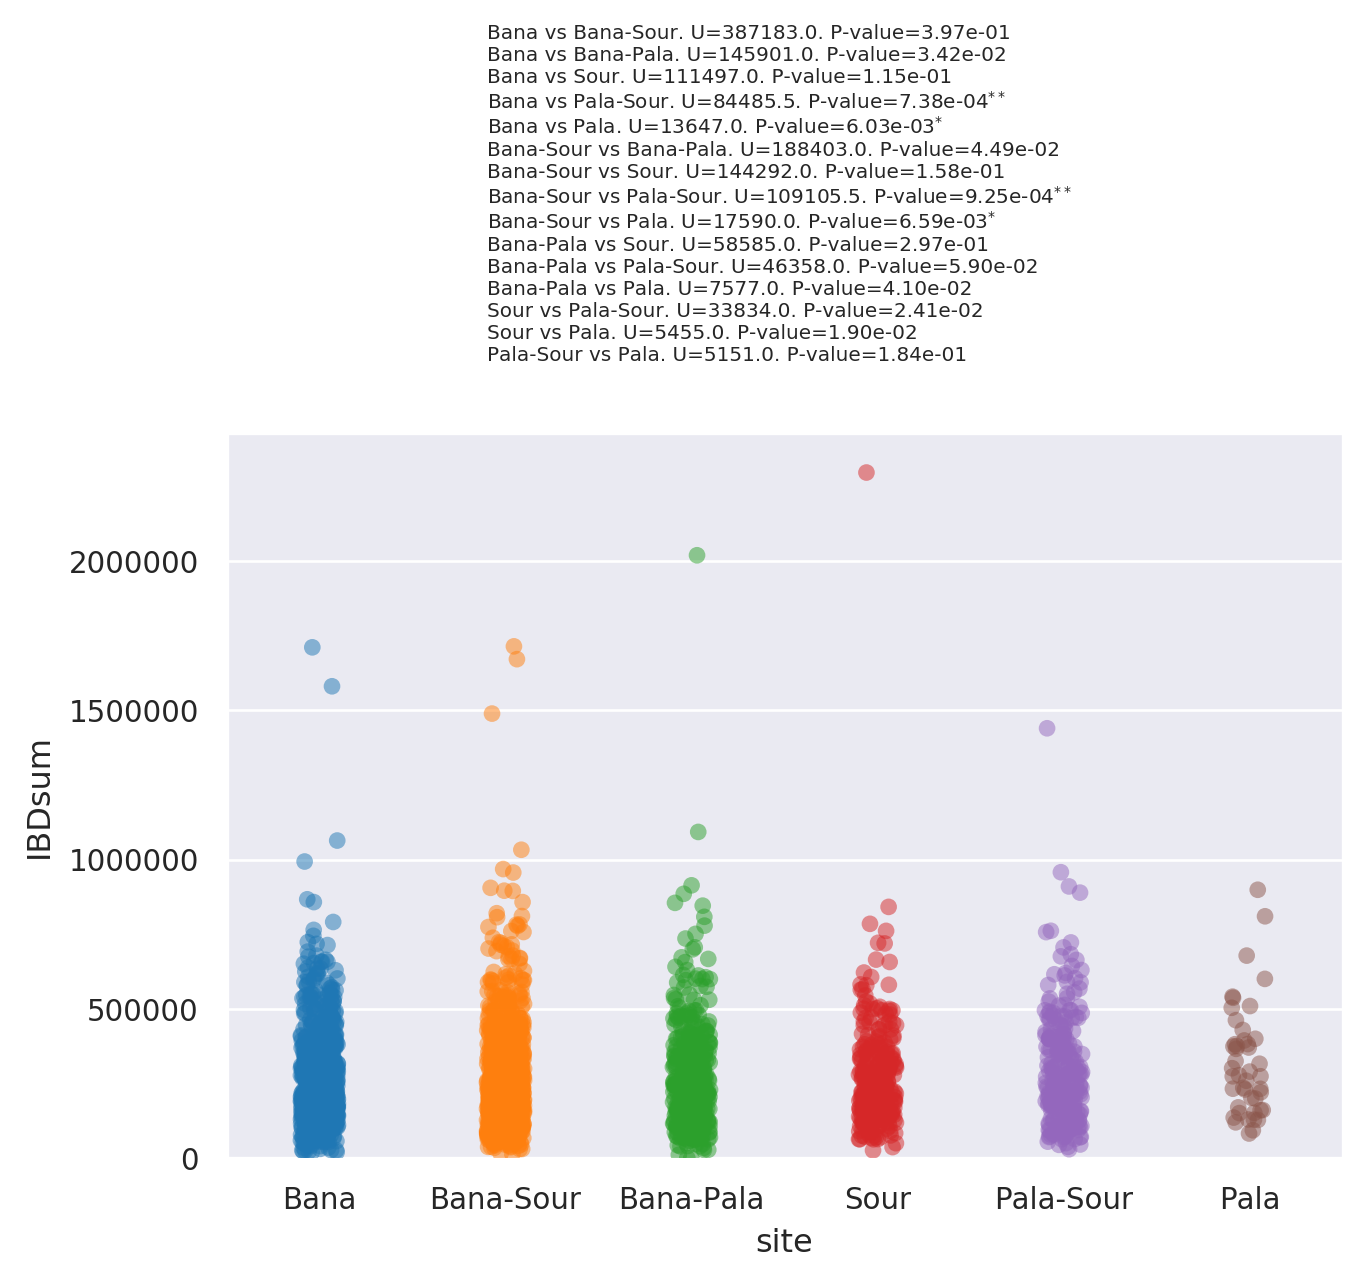

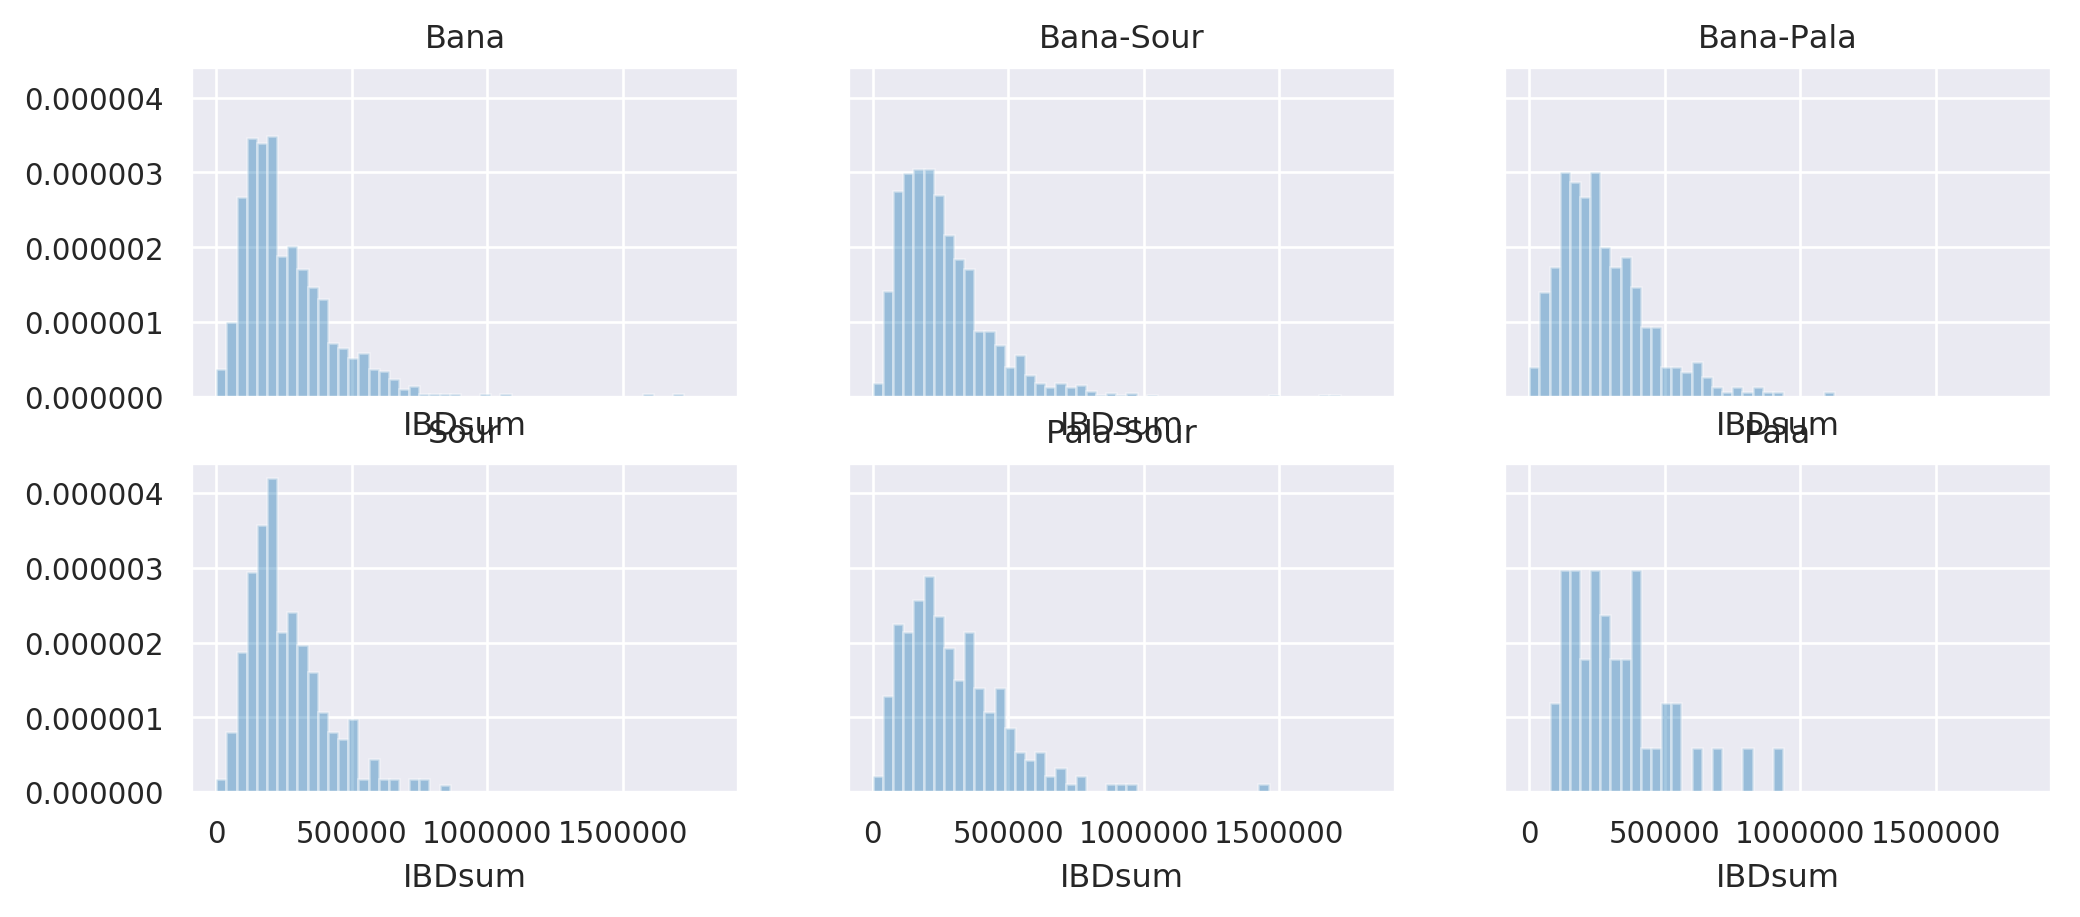

In [24]:
_ = analysis_wrapper("BFcol", df_samples, 'greater_region')

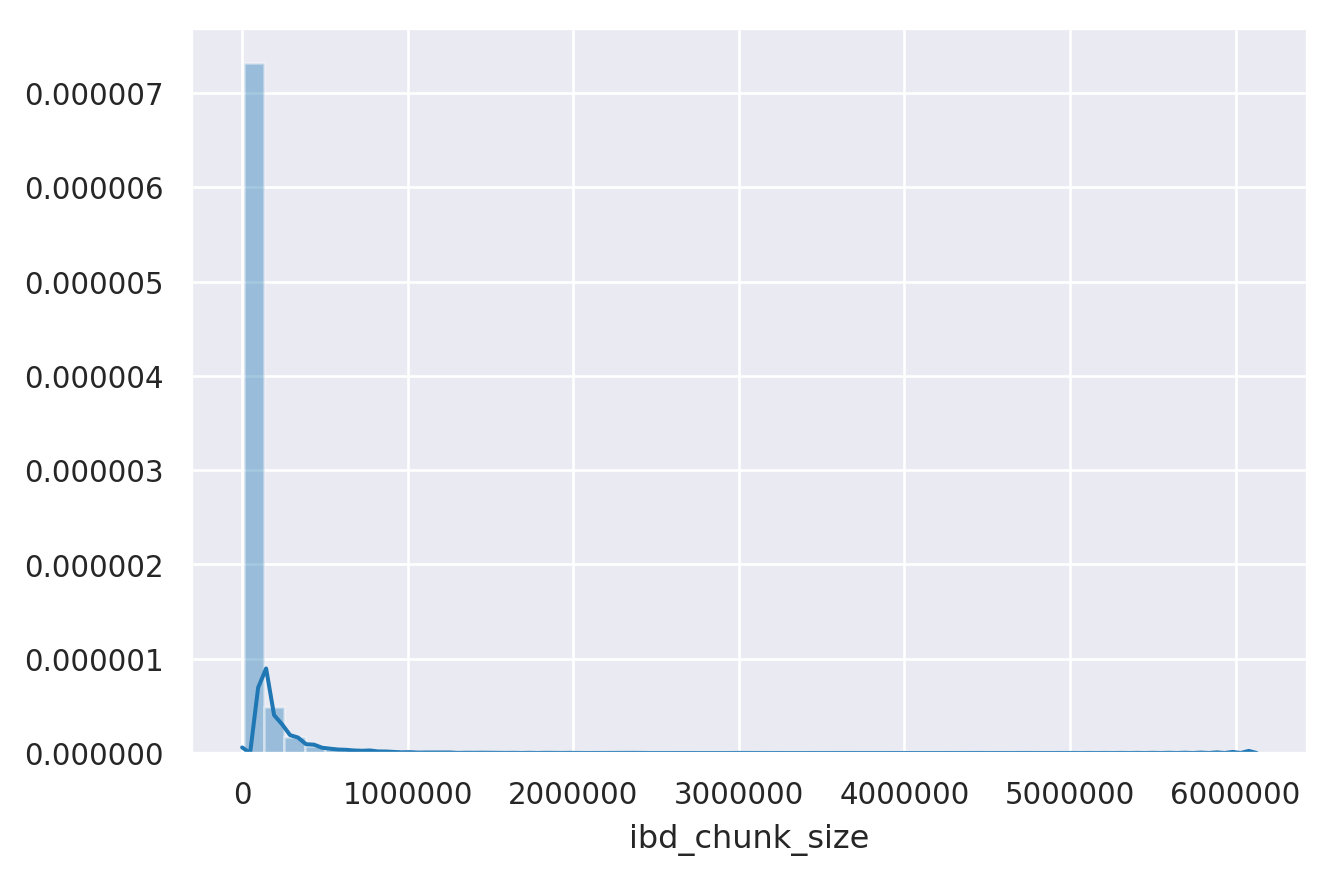

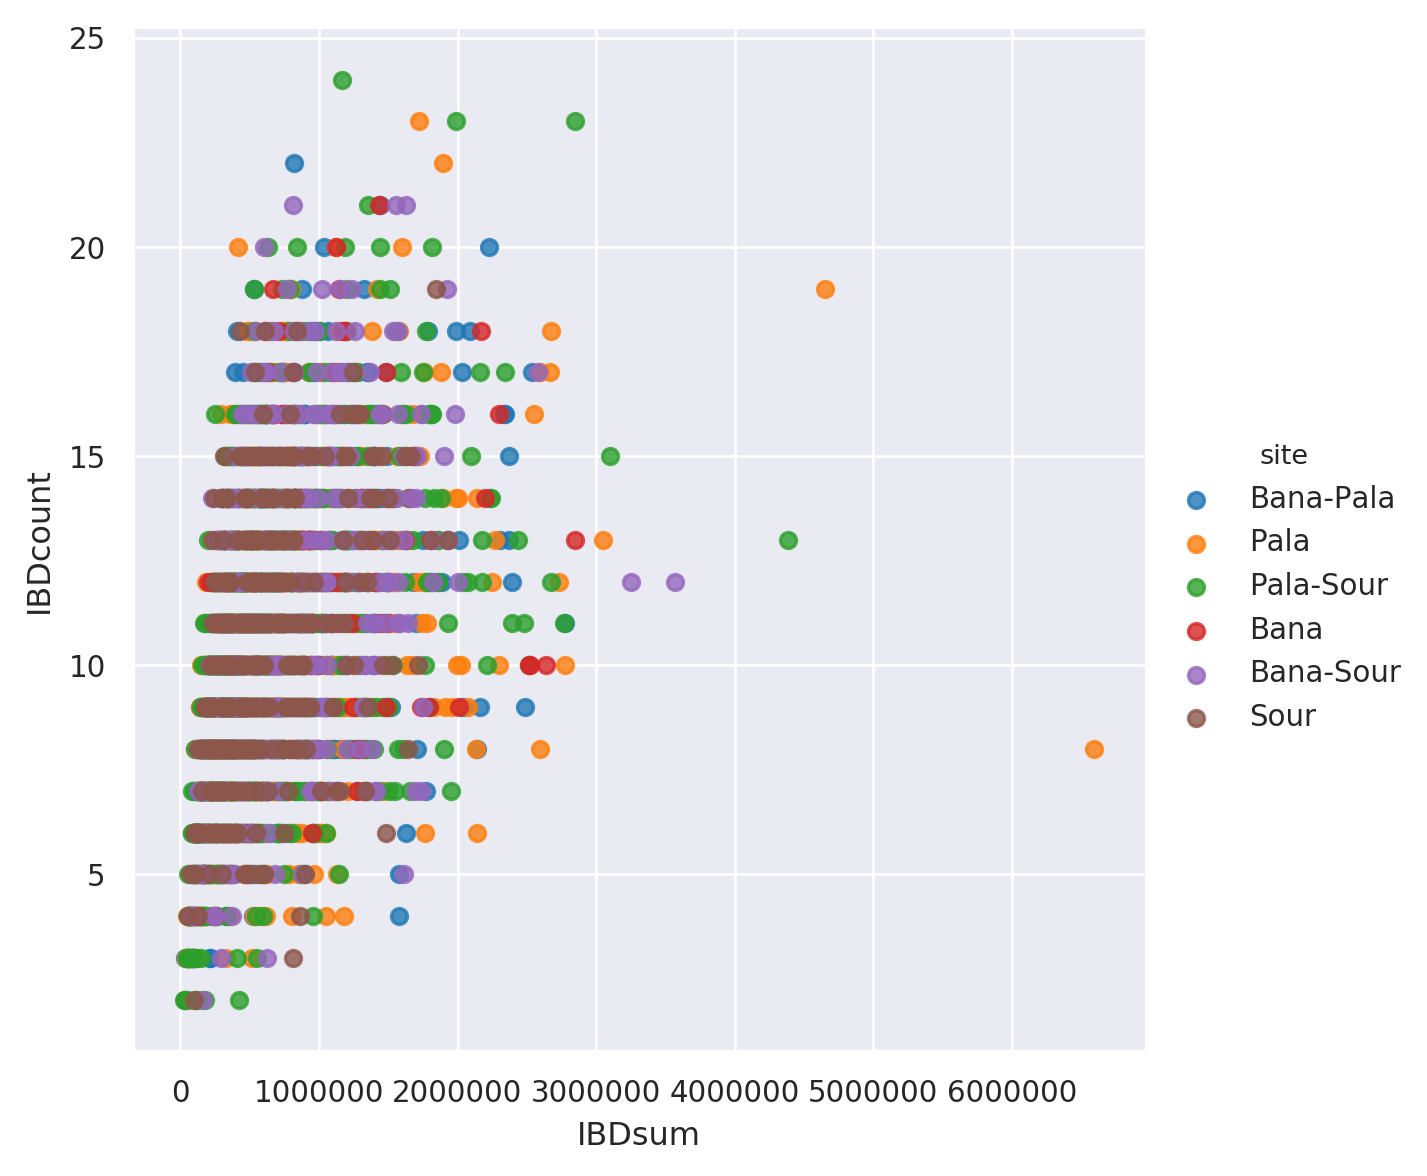

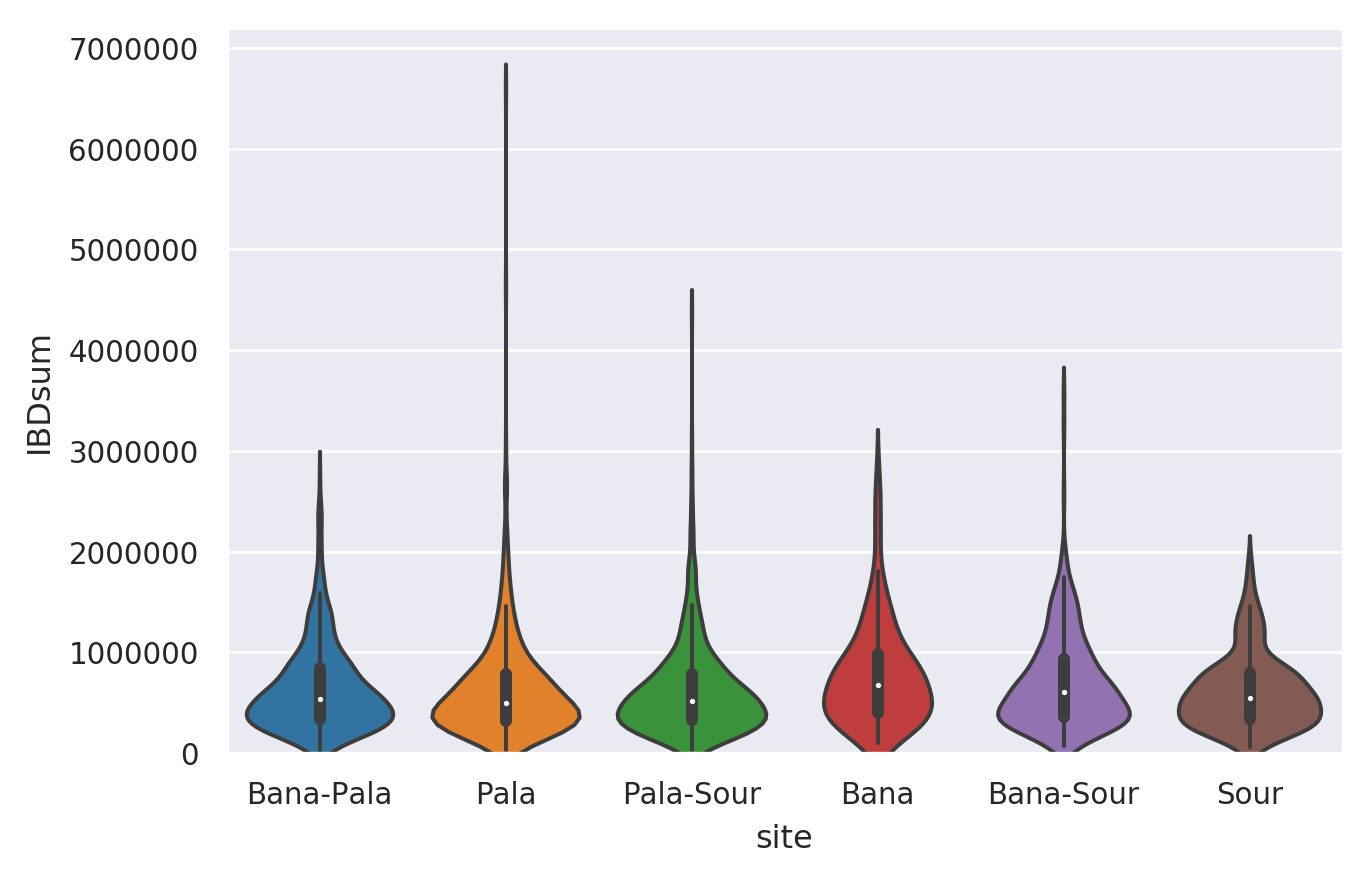

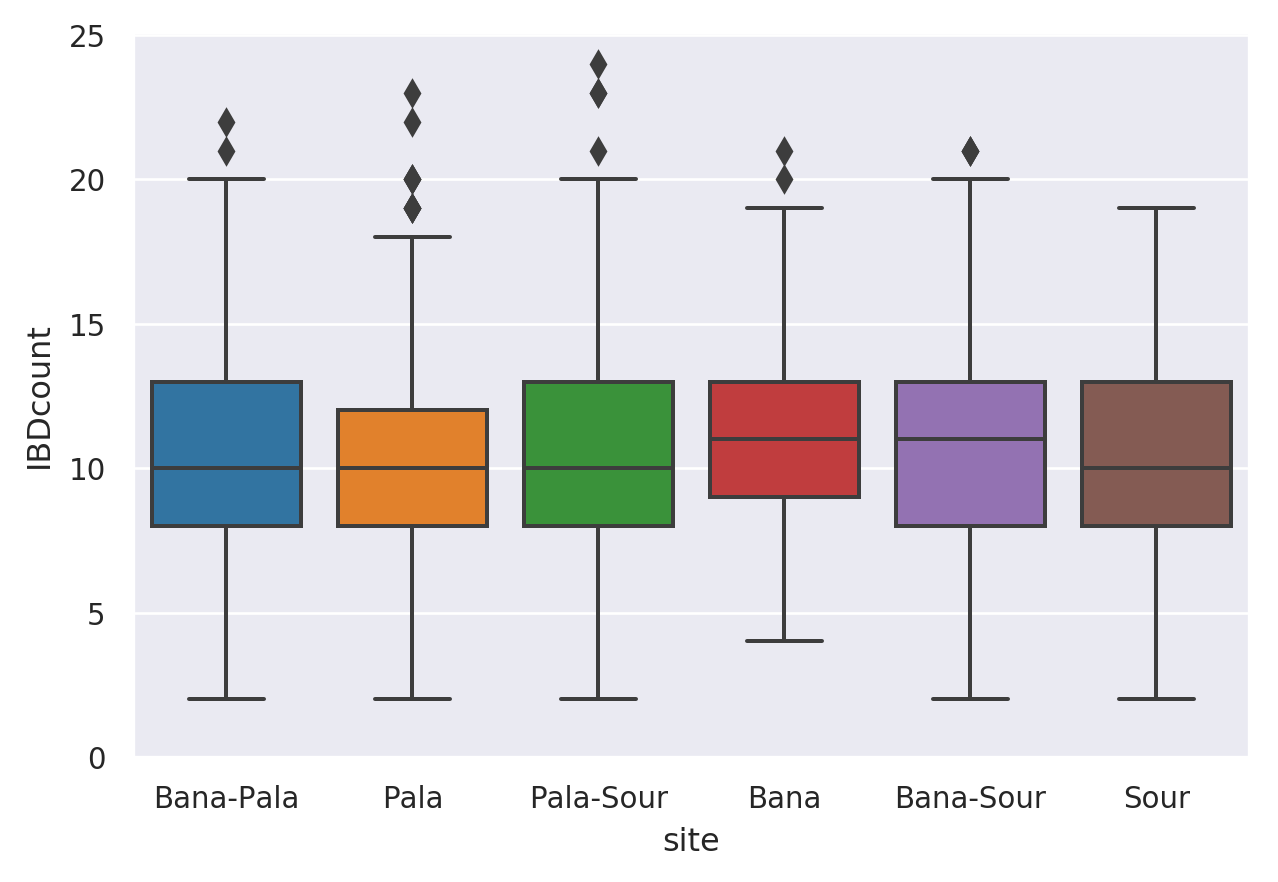

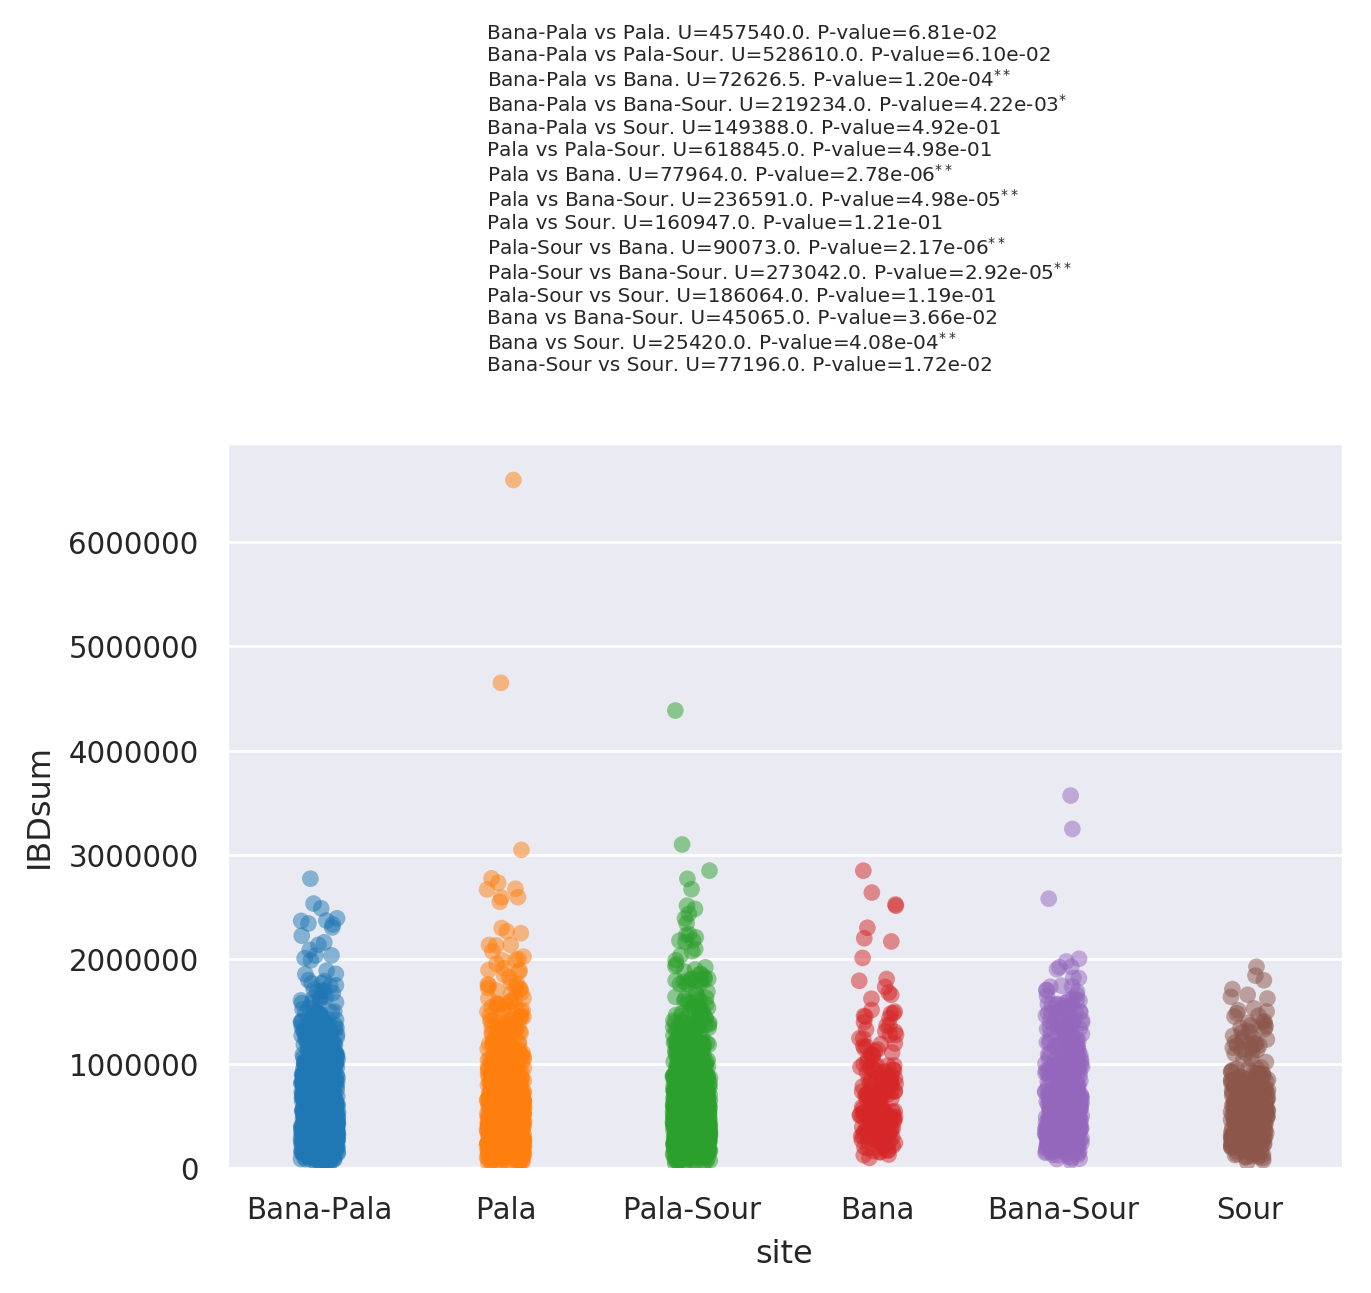

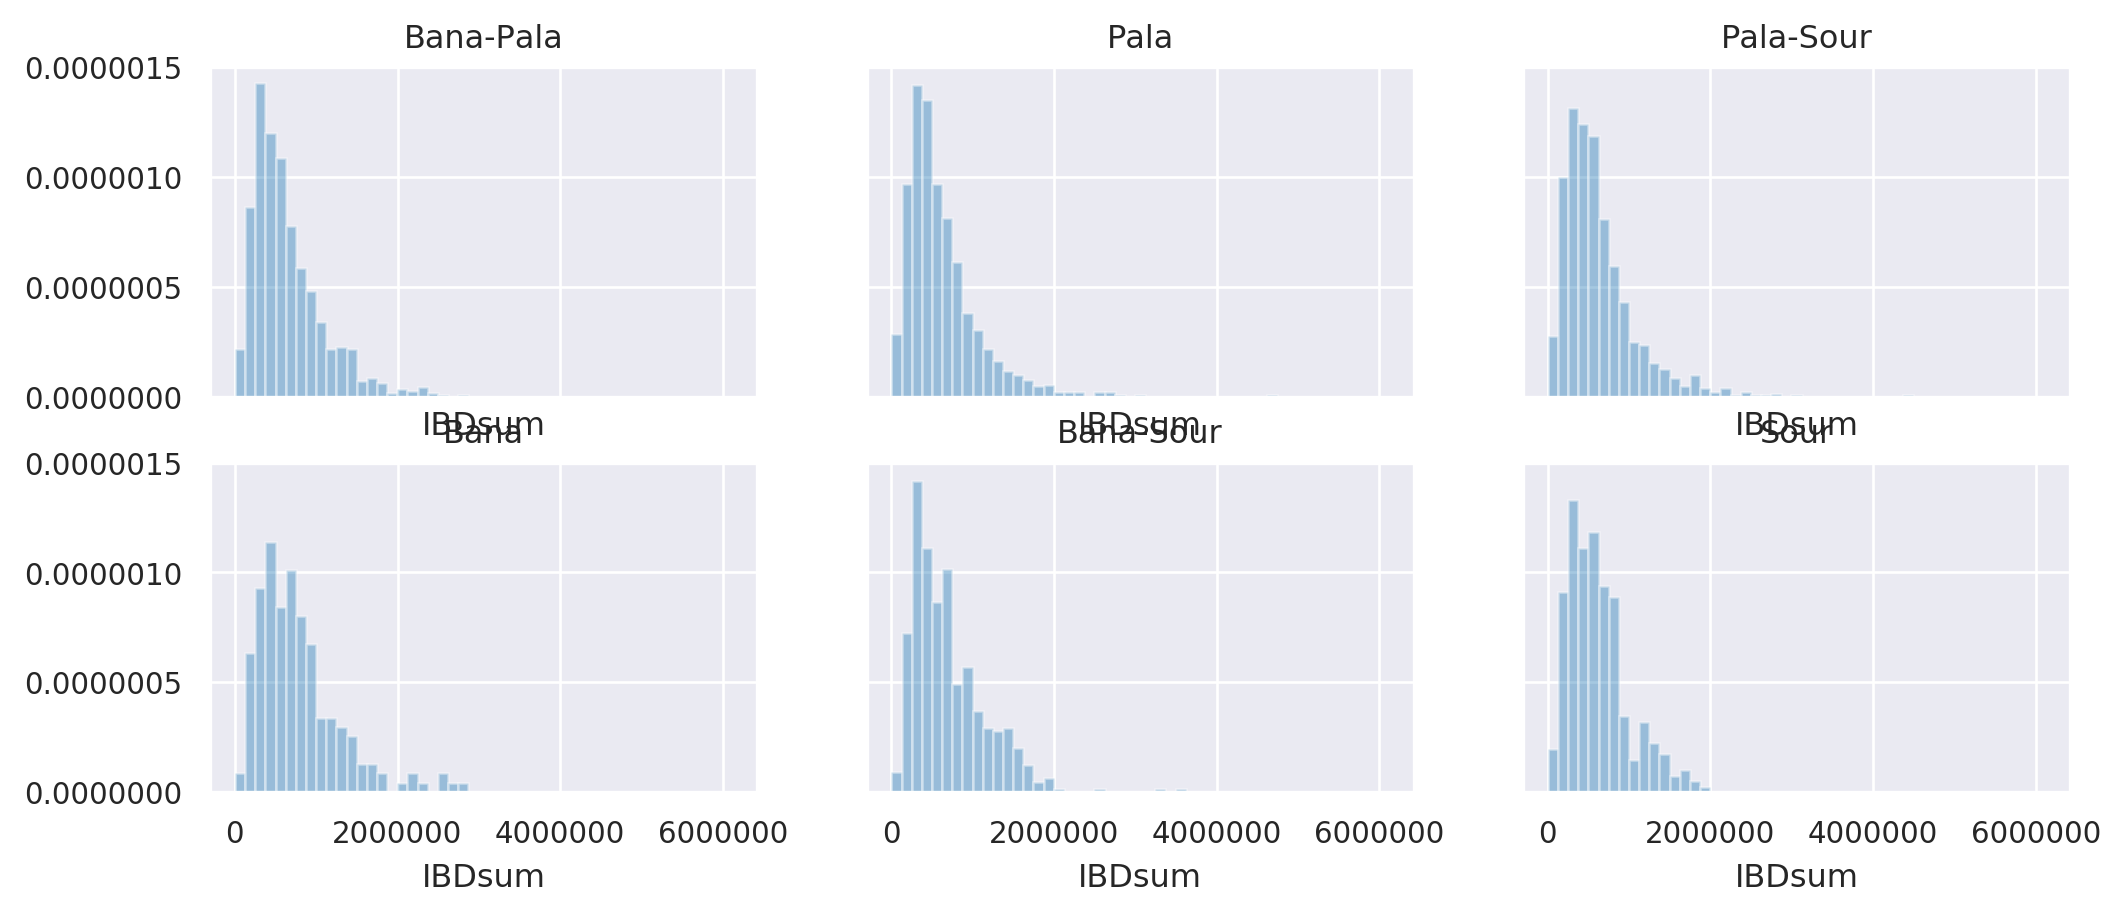

In [25]:
_ = analysis_wrapper("BFgam", df_samples, 'greater_region')

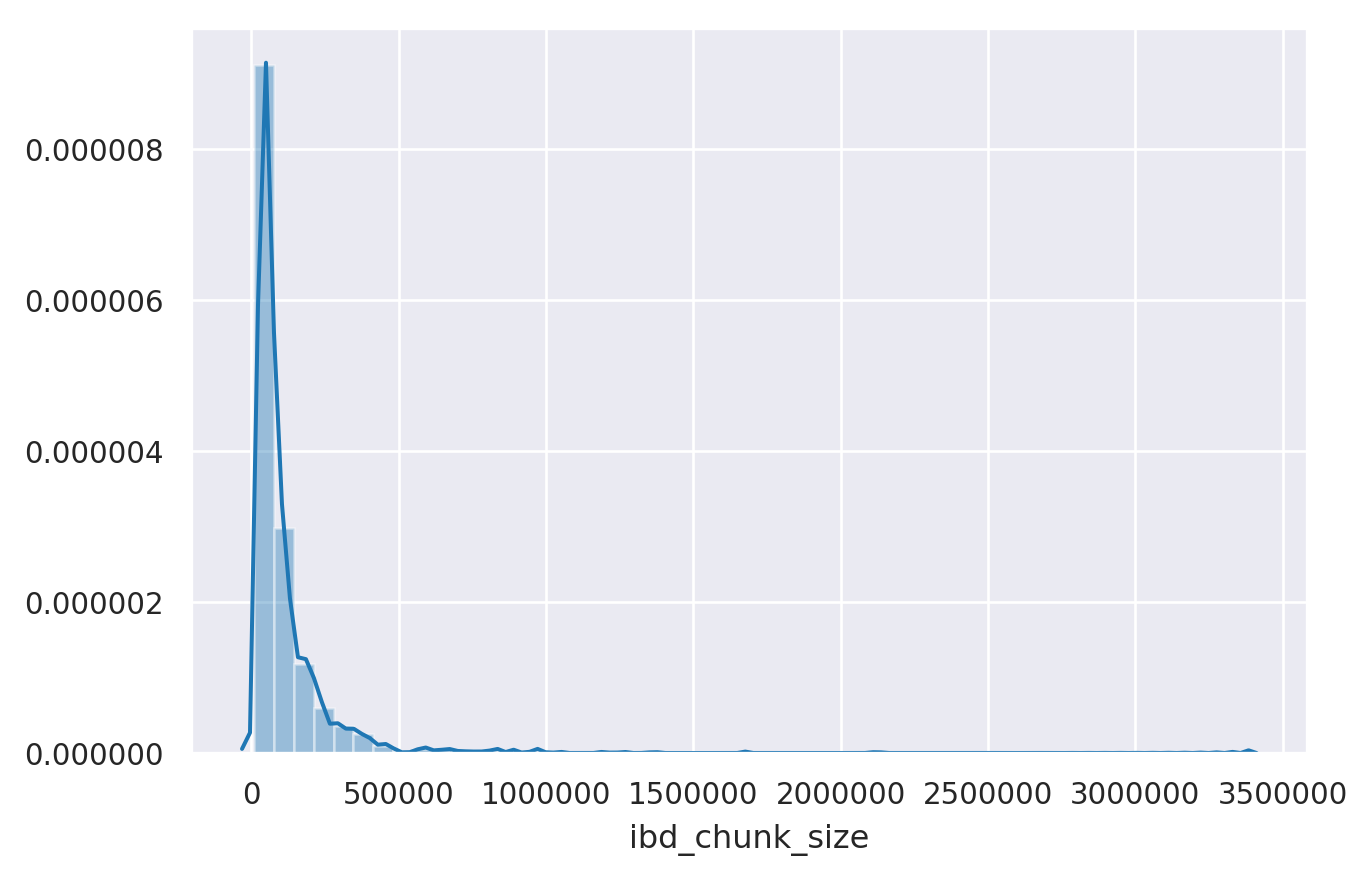

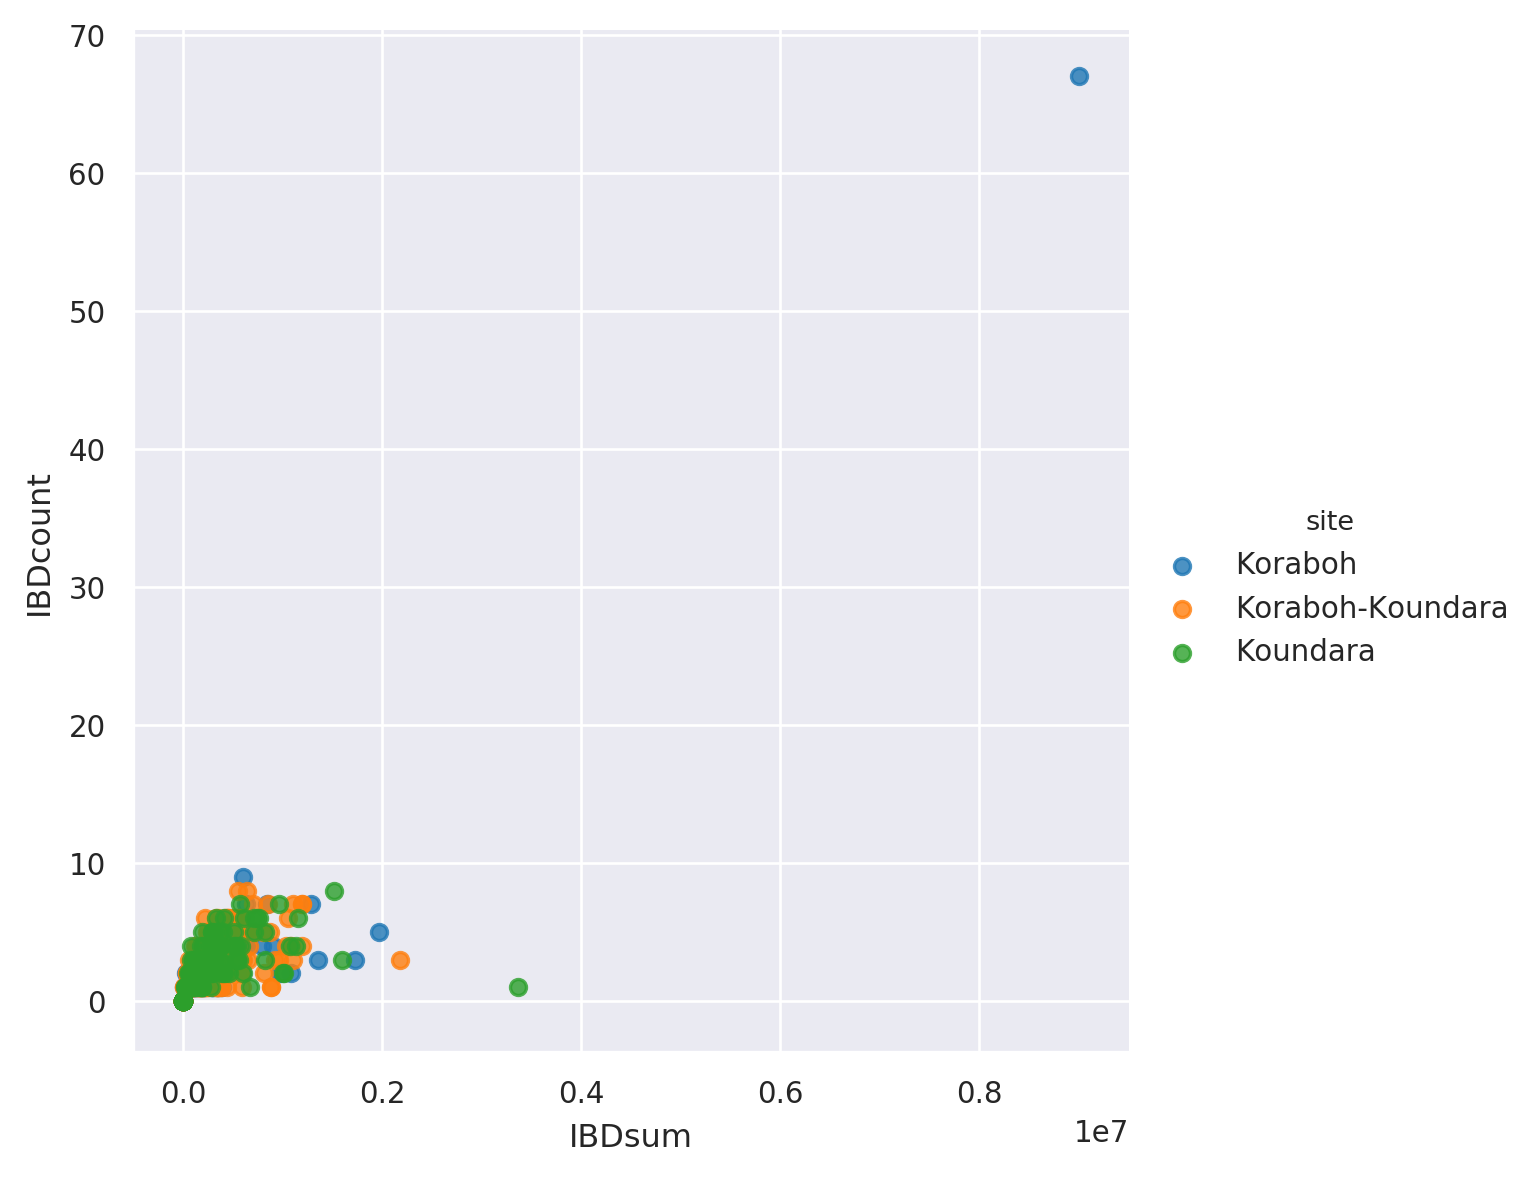

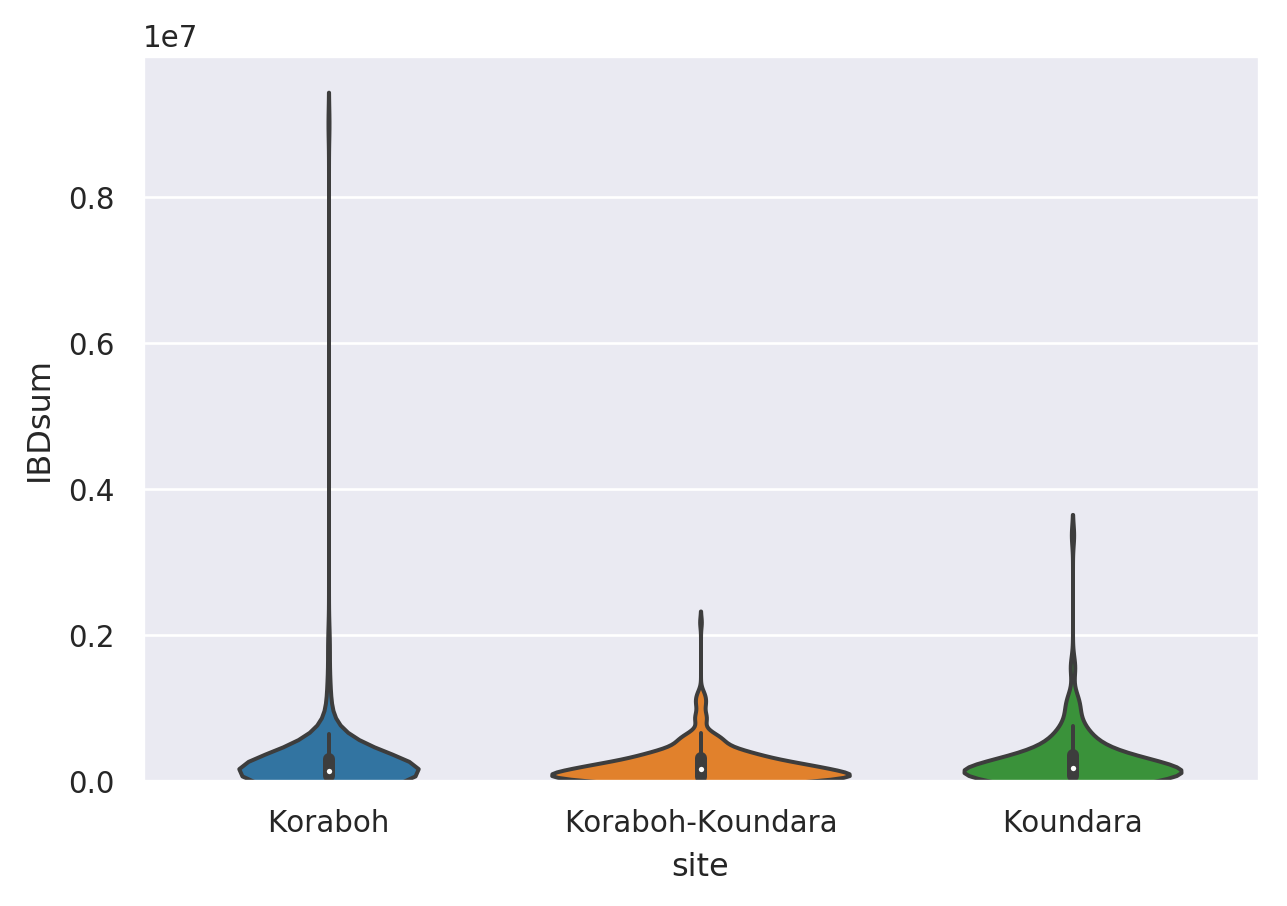

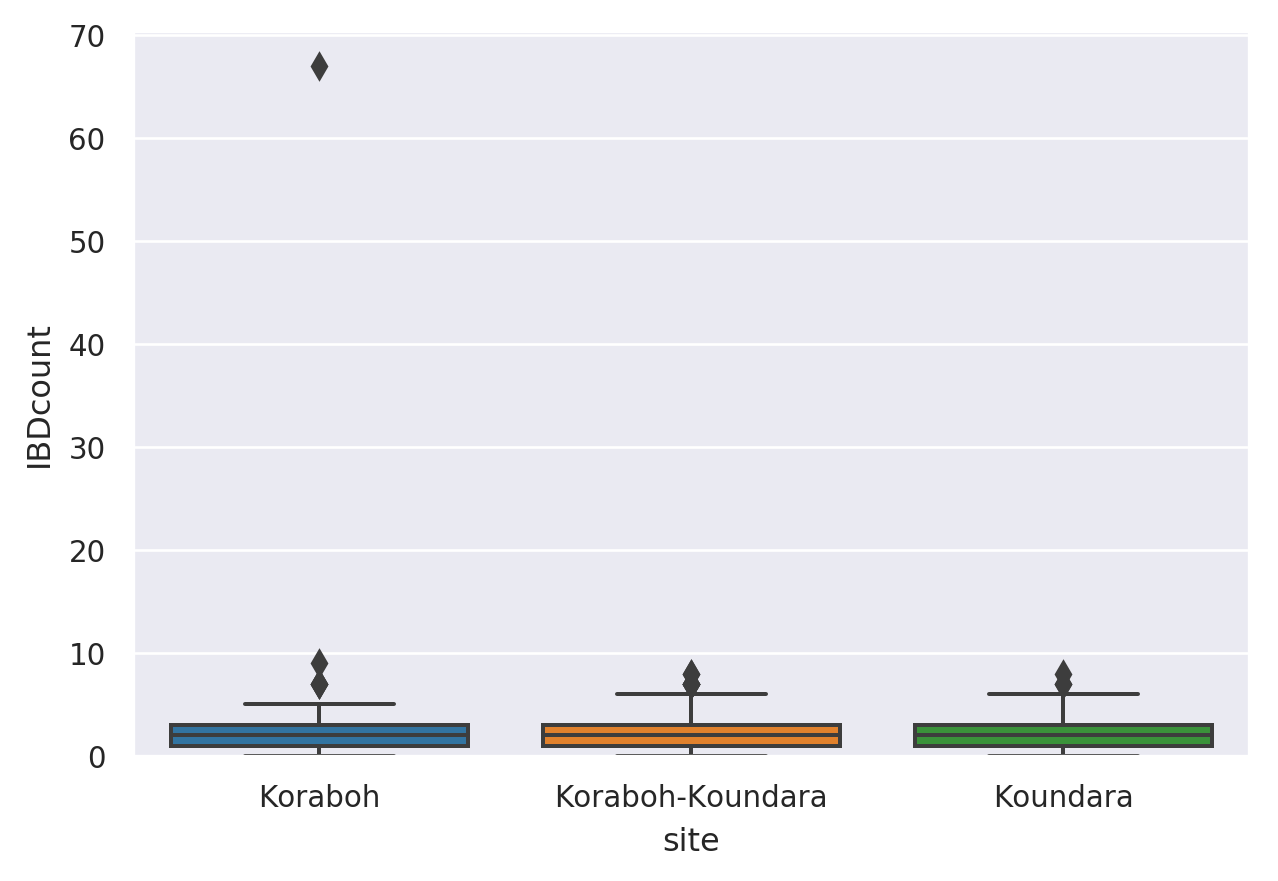

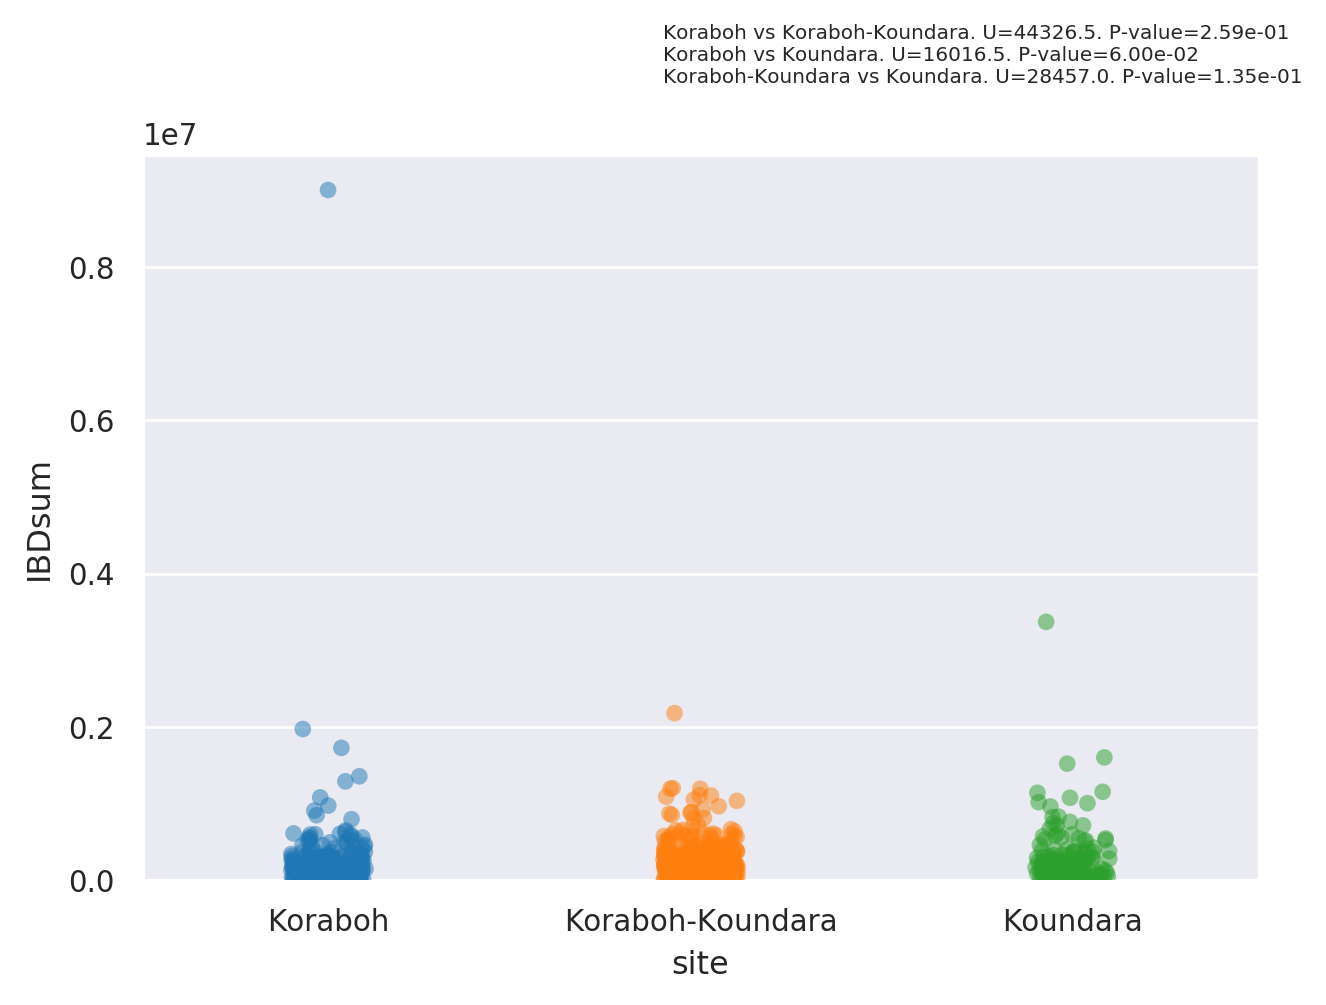

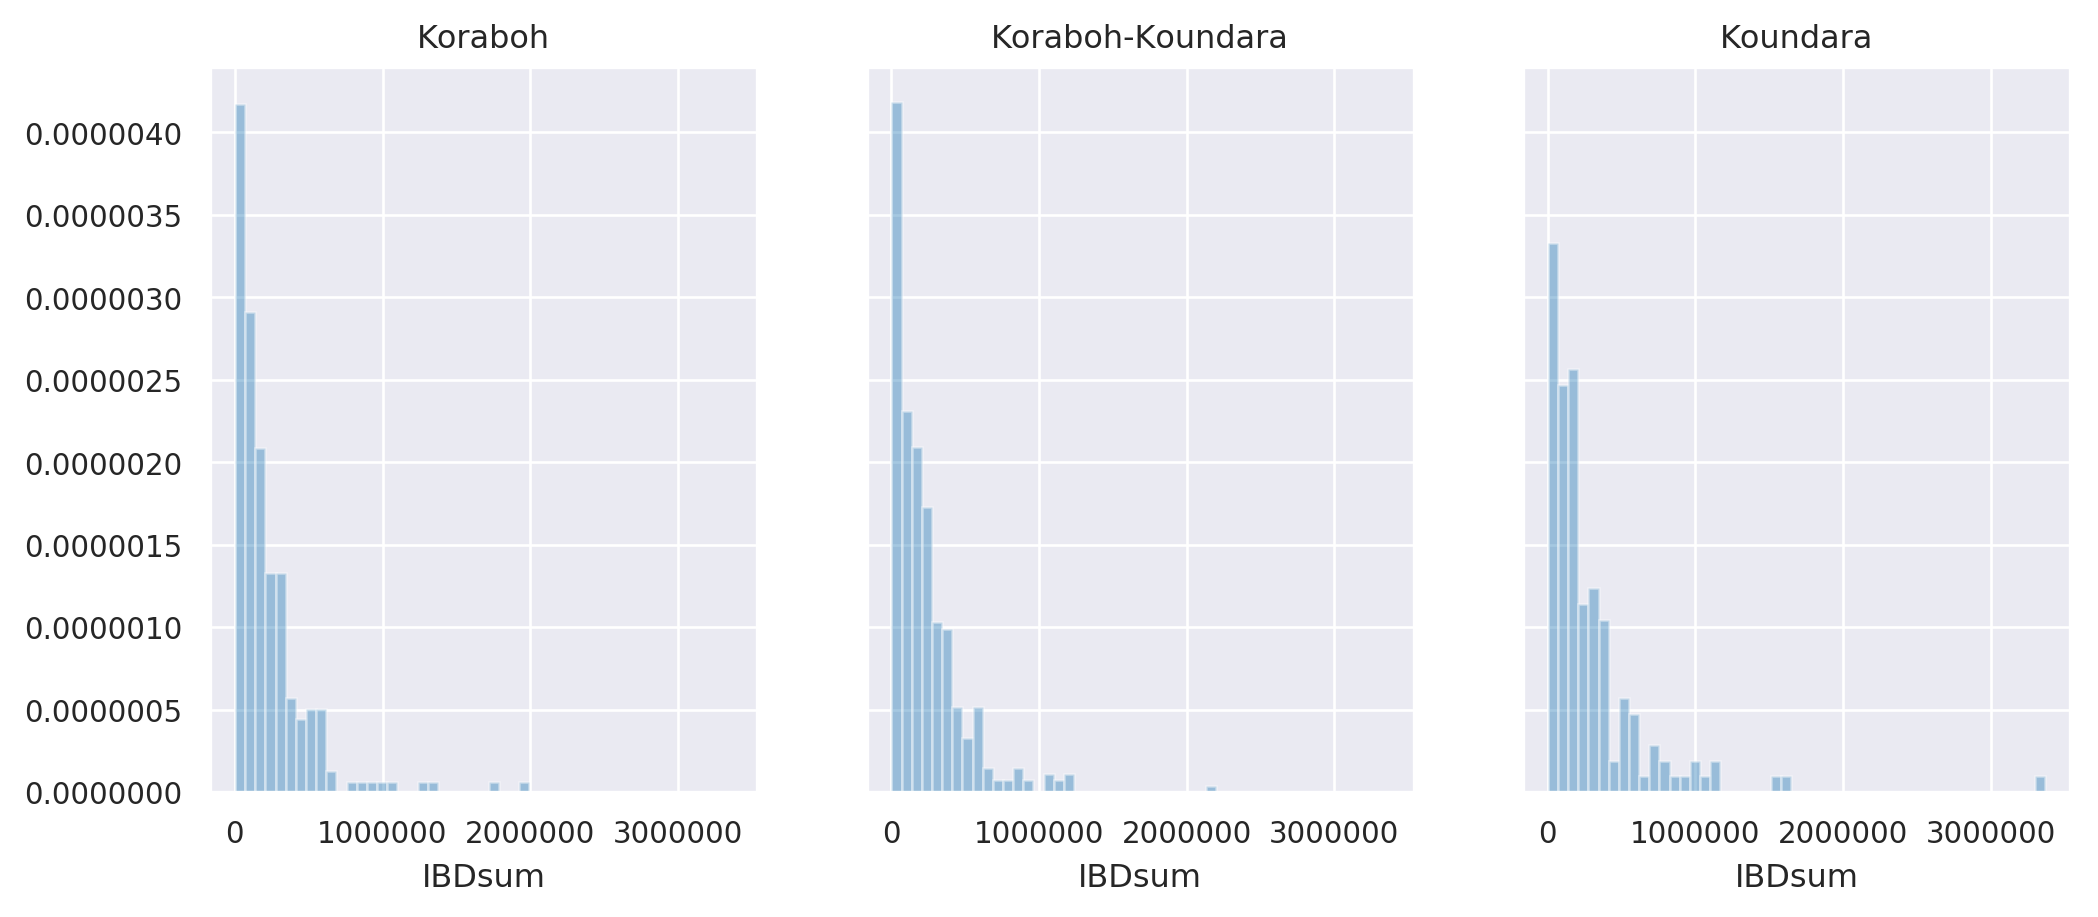

In [26]:
_ = analysis_wrapper("GNgam", df_samples, 'greater_region')

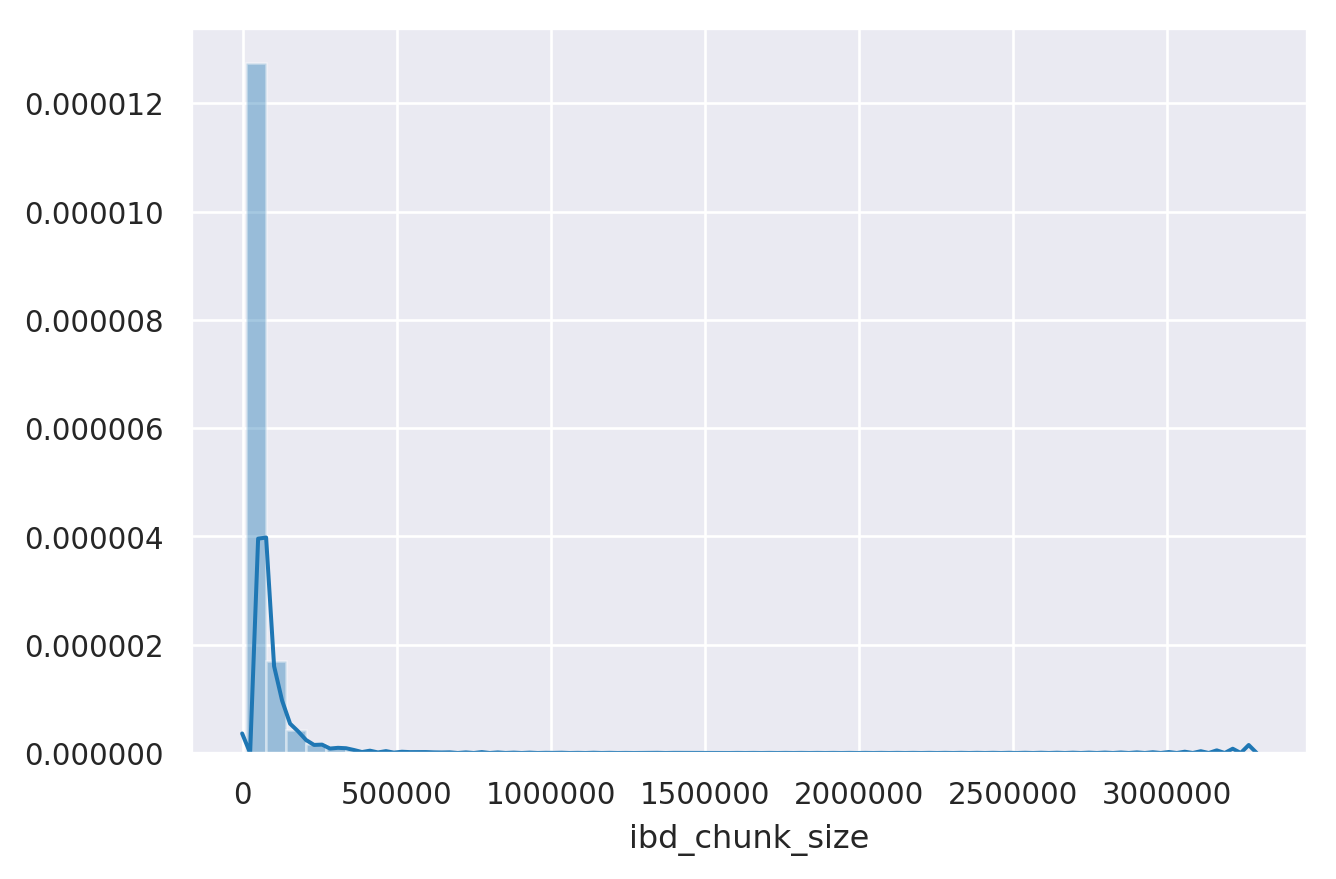

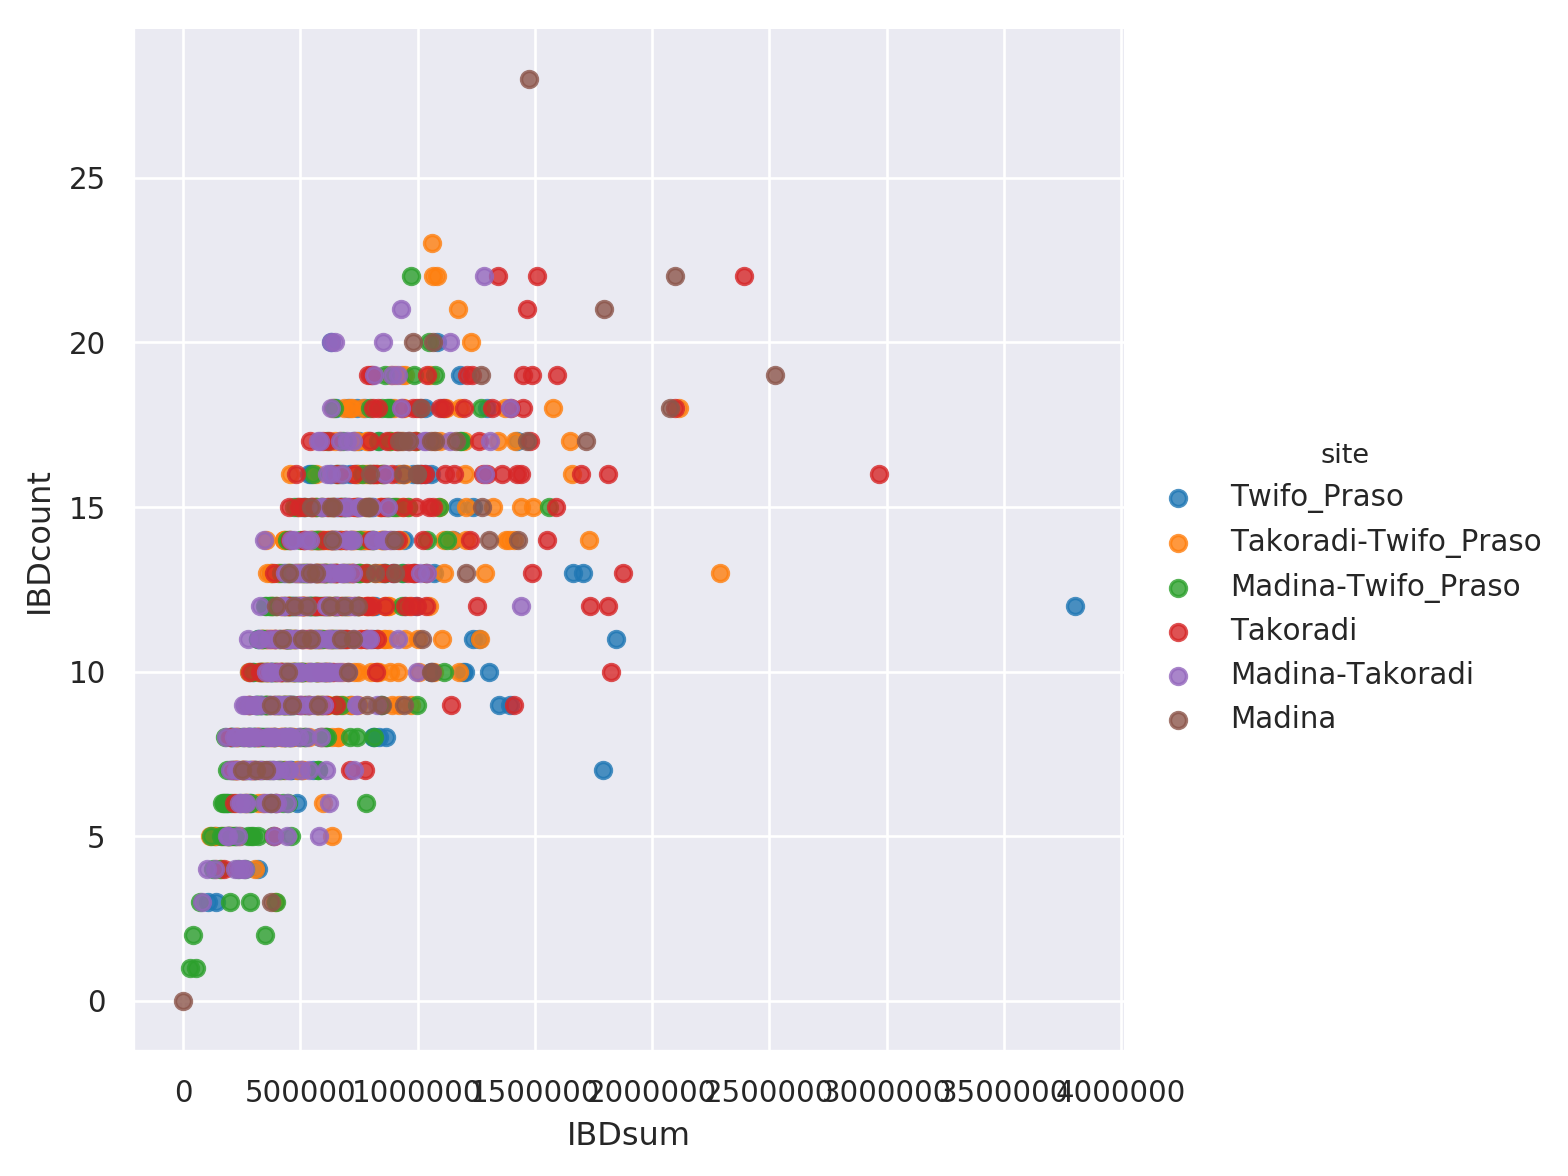

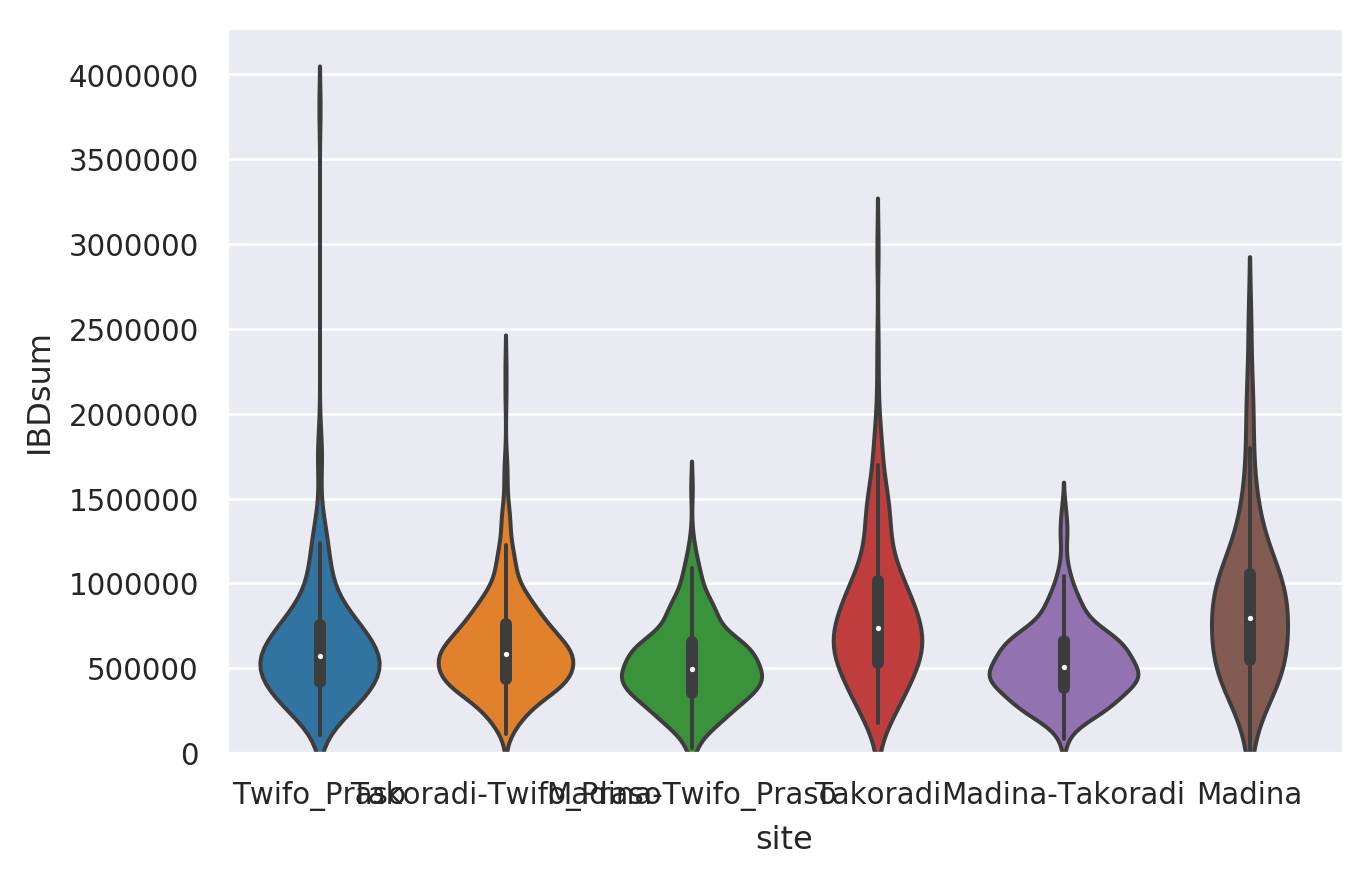

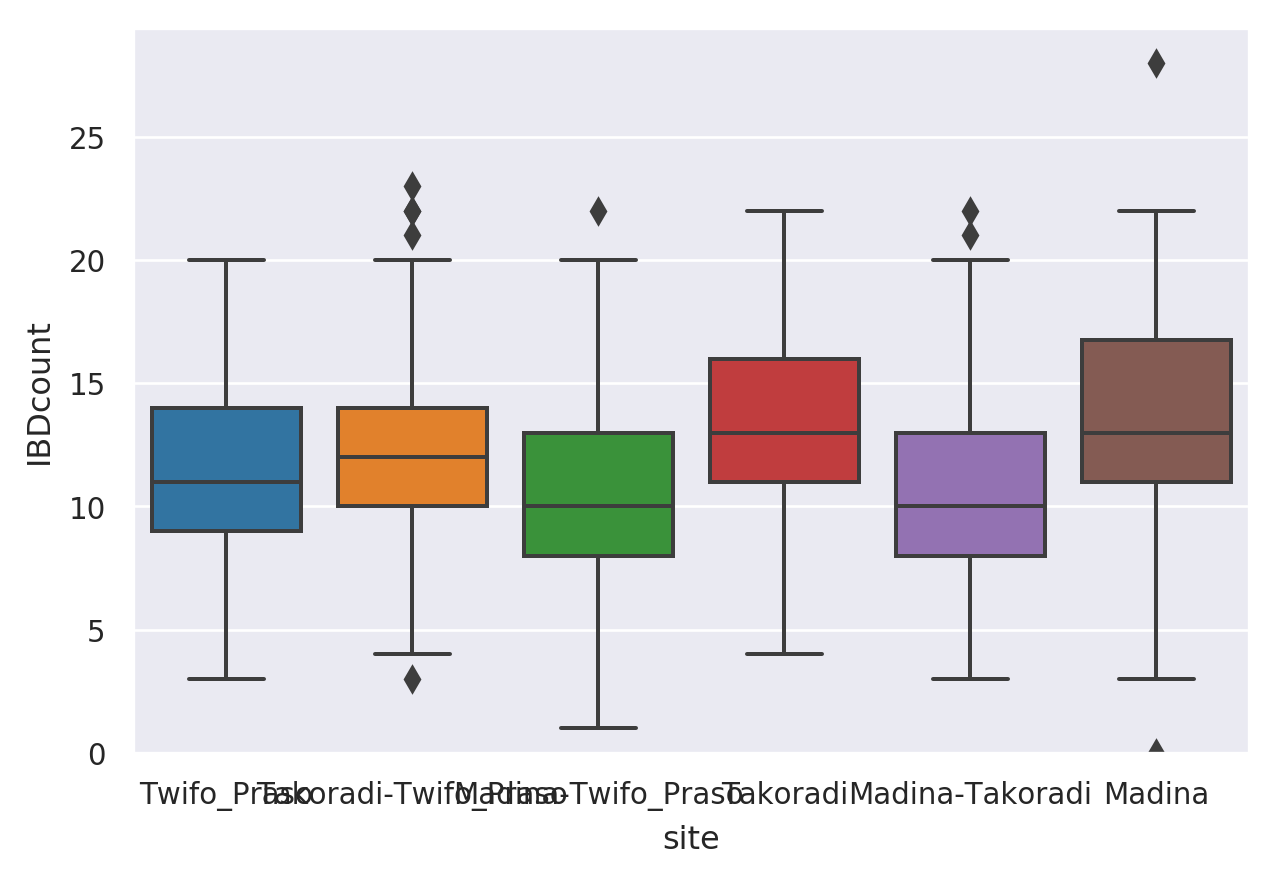

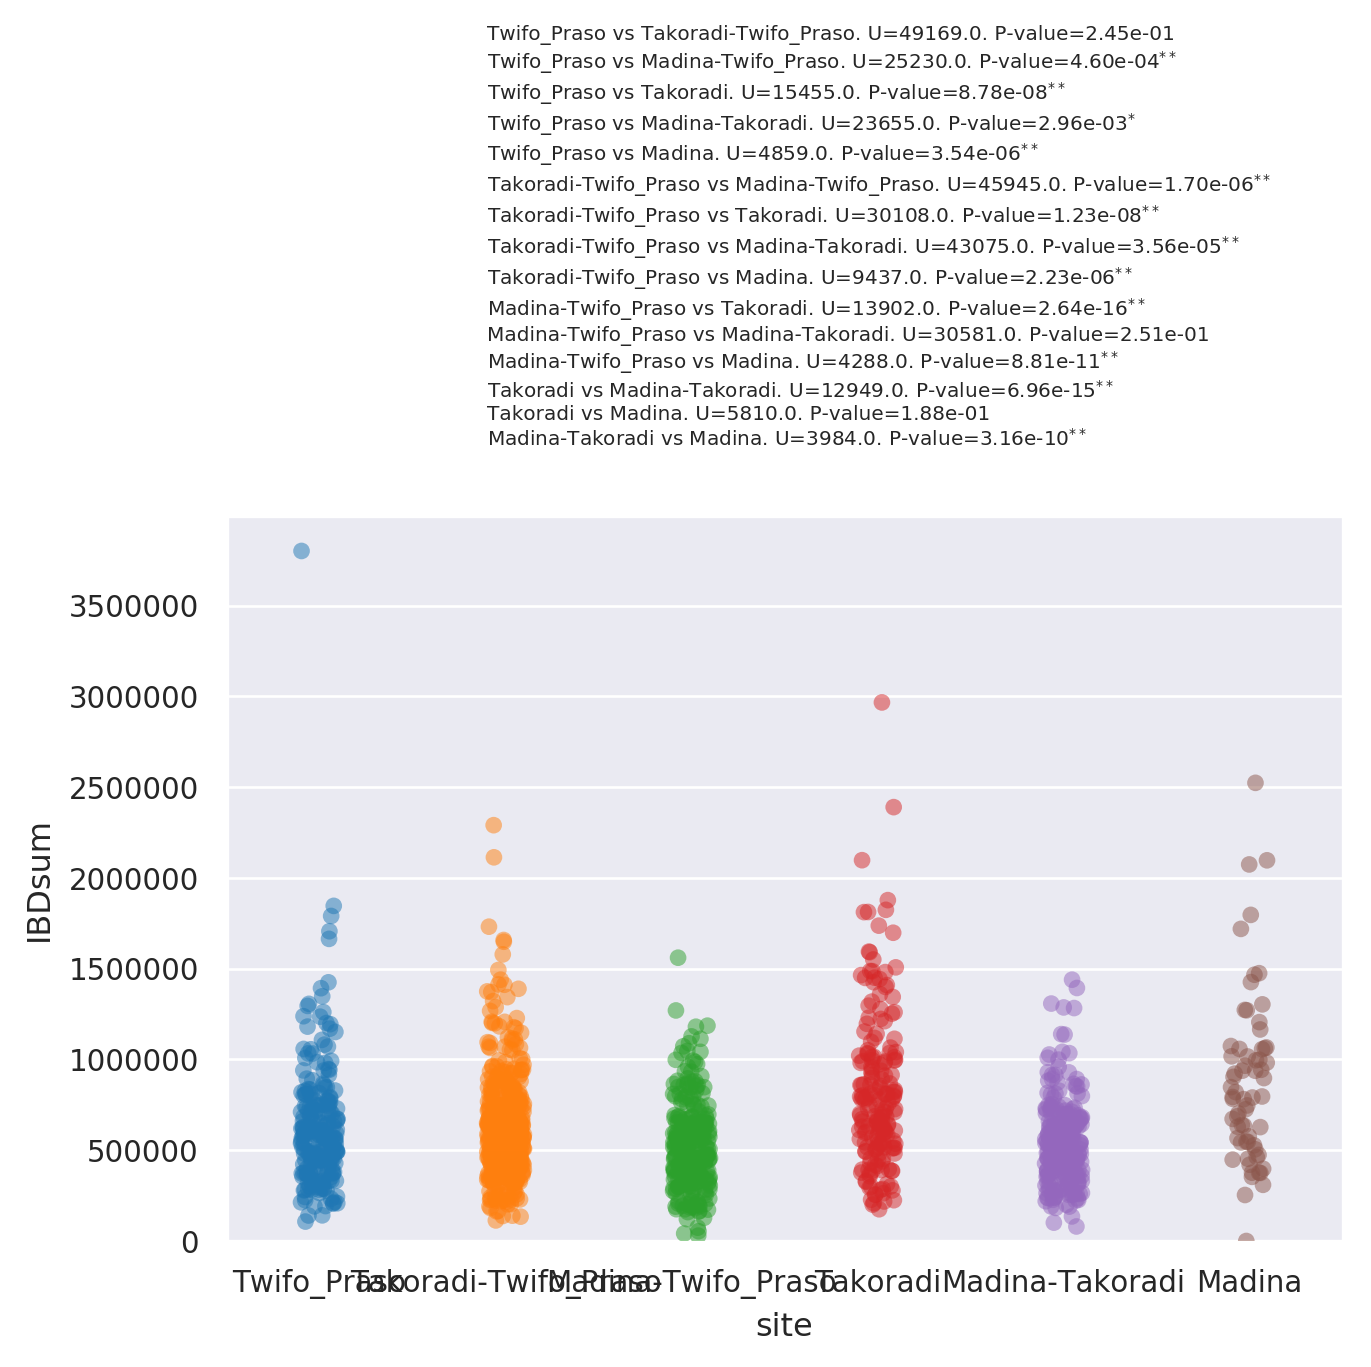

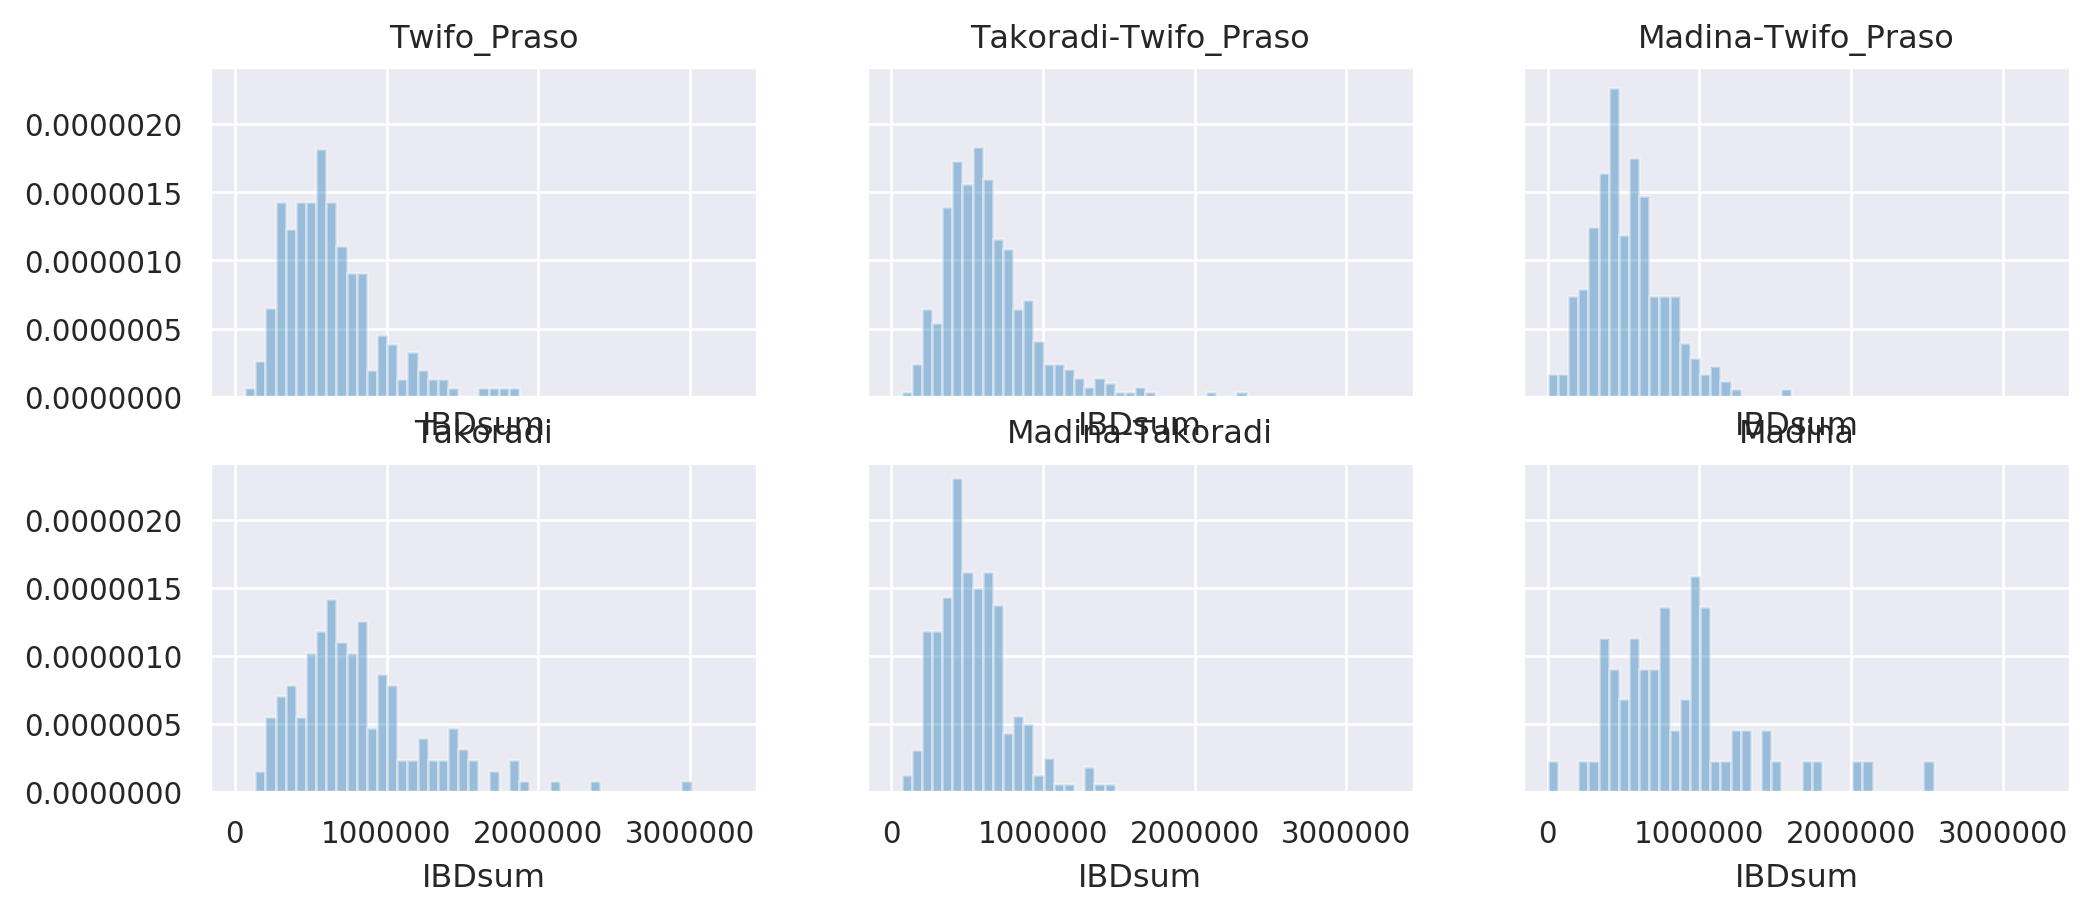

In [27]:
_ = analysis_wrapper("GHcol", df_samples, 'greater_region')